# Capstone Project - The Battle of Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [1. Introduction to the Business Problem](#introduction)
* [2. Description of the data and use in solving the problem](#data)
* [3. Methodology](#methodology)
* [4. Model and Evaluation](#model)
* [5. Results and Discussion](#results)
* [5.1. Resume of Results](#resume)
* [6. Conclusions](#conclusion)

## 1. Introduction to the Business Problem <a name="introduction"></a>

Usually, investors are looking to minimize the risk of an investment, so they look for information (processed data) that will allow you to narrow the evaluation to make your investment decision. The location analysis and the determination of the variables and characteristics that allow to determine the selection of an investment in a business of type of commercial or services is important. The support and provide of this characterization and location patterns of a business that allows to limit the investment risk is decisive today especially if the objective is of small or medium investors who need to project potential income and expenses of the selected alternative.
This project attempts to provide as a result and achieve the following objectives:

* Characterization and segmentation of New York Neighborhoods based on commercial premises (sale of products or services) around the study centers.
* Recognize patterns of expiration associated with the central focus of the study centers. Is it important to invest in a cafeteria or gym around a university or a college, associated with the number of people and businesses associated with a study center?
* Discreet labeling of business groups around education institutions. This classification is characteristic of the variables and location of the observations of the dataset used.

For this we will apply a K-means Cluster model to the data set of the New York education institutions as a case that can be extended to other cities.

### 1.1. Business Problem
This approach of the "The Battle of Neighborhoods" project is to provide quality and timely information to reduce the risk of investors in businesses that can be developed or acquired in neighboring neighborhoods to educational institutions.
The questions we could answer are:
* (a) What are the top n businesses (5,10) that are developed around a university, considering its population, location?
* (b) What types of businesses are developed around schools for children? 

The key question is: (What?)
Unknowing by investors of the 10 best types of service companies (cafes, restaurants, hotels ...) that are developed around the locations of educational institutions in a city.

### 1.2. Interested audience

The interest groups are varied which can be people or institutions that can use the results of the Cluster model, such as those indicated:
* Investors in small and medium businesses, have data that determine the types of businesses that are developed around Education Institutions.
* Professional evaluation of economic development of neighborhoods of a city, using the characterization of clusters.
* Companies looking for (local) locations to install franchise-based businesses (Starkbucs, Subway, Pizza Hut ...)
* Financial Companies to evaluate and limit risks associated with loans to investors who wish to invest in neighborhoods associated with this project.
* Real Estate Companies for the sustained development of real estate construction or renovation projects in the neighborhoods associated with the results of the clusterization.

## 2. Description of the data and use in solving the problem <a name="data"></a>

For this project, we will use a K Means Grouping model, to group types of businesses located around the United States Study Centers, specifically New York. The data source is the website of "Homeland Infrastructure Foundation-Level Data (HIFLD)" which considers as Centers of Studies to Universities, Colleges, Institutes, for our case we consider the data to this reference of the city of New York.

The Source is https://hifld-geoplatform.opendata.arcgis.com/datasets/colleges-and-universities, we will use a data frame with 7150 observations in the following 45 variables (Last update 2 months ago).

<table border="1">
    <caption><H3><b>DataSet Columns</b></H3></caption>
	<tr><th>Columns/ Type (1-15)</th> <th>Columns/ Type (16-30)</th> <th>Columns/ Type (31-45)</th>	</tr>
	<tr><td>X, type number </td><td>COUNTYFIPS, Int64.Type</td> <td>HI_OFFER, Int64.Type</td></tr>
    <tr><td>Y, type number </td><td>COUNTRY, type text</td><td>DEG_GRANT, Int64.Type</td></tr>
    <tr><td>OBJECTID, Int64.Type </td> <td>LATITUDE, type number</td><td>LOCALE, Int64.Type</td></tr>
    <tr><td>IPEDSID, Int64.Type </td> <td>LONGITUDE, type number</td><td>CLOSE_DATE, type text</td></tr>
    <tr><td>NAME, type text </td> <td>NAICS_CODE, Int64.Type</td><td>MERGE_ID, Int64.Type</td></tr>
   	<tr><td>ADDRESS, type text</td><td>NAICS_DESC, type text</td> <td>ALIAS, type text</td></tr>
    <tr><td>CITY, type text</td><td>SOURCE, type text</td><td>SIZE_SET, Int64.Type</td></tr>
    <tr><td>STATE, type text</td> <td>SOURCEDATE, type datetime</td><td>INST_SIZE, Int64.Type</td></tr>
    <tr><td>ZIP, Int64.Type</td> <td>VAL_METHOD, type text</td><td>PT_ENROLL, Int64.Type</td></tr>
    <tr><td>ZIP4, type text</td> <td>VAL_DATE, type datetime</td><td>FT_ENROLL, Int64.Type</td></tr>
    <tr><td>TELEPHONE, type text</td><td>WEBSITE, type text</td> <td>TOT_ENROLL, Int64.Type</td></tr>
    <tr><td>TYPE, Int64.Type </td><td>STFIPS, Int64.Type</td><td>HOUSING, Int64.Type</td></tr>
    <tr><td>STATUS, type text</td> <td>COFIPS, Int64.Type</td><td>DORM_CAP, Int64.Type</td></tr>
    <tr><td>POPULATION, Int64.Type </td> <td>SECTOR, Int64.Type</td><td>TOT_EMP, Int64.Type</td></tr>
    <tr><td>COUNTY, type text</td> <td>LEVEL_, Int64.Type</td><td>SHELTER_ID, type text</td></tr>
</table>

There are variables of the DataSet that does not contribute to the analysis of business characterization that one wishes to obtain from the data, such as columns X and Y, which are LATITUDE and LONGITUDE.
Additionally we will add data from FOURSQUARE, about neighboring locations to selected study centers in New York City.

### Description of columns to use

| Column Name   | Type          | Description                                            | 
| :------------ | :------------ | :----------------------------------------------------- | 
| ADDRESS       | Text    | The Dirección de una institución educativa de EEUU, which is unique. | 
| NAME | Text   | Name of the education institution. |
| CITY	        | Text   | City where the institution is located. |
| STATE	        | Text   | State where the institution is located. |
| TYPE	        | Int    | educational level classification. |
| POPULATION    | Int    | Población del Centro de estudios. |
| LATITUDE	    | Float  | Geospatial Coordinate. |
| LONGITUDE     | Float  | Geospatial Coordinate. |
| NAICS_DESC    | Text   | Description of the NAICS Classification of the Studies Center. |
| LEVEL_	    | Int    | Group codes that indicate, 1: Colleges, Universities, 2: Kindergarten, Children schools, 3: Specialties such as Computing, Cosmetology and others. |
| TOT_ENROLL    | Int    | Number of people enrolled. |
| TOT_EMP       | Int    | Number of employees of the institution. |



## 3. Methodology <a name="methodology"></a>

To provide data information that allows reducing the risks of investors in neighborhoods close to study institutions such as; Universities, colleges, children's schools, other institutions.
We started acquiring data on education institutions, this data set has observations from all over the country of the United States.
Then we apply select the observations of the city of New York, this is called Subseting, we reduce variables (columns) that are redundant for the application of the grouping model (Clusterization). such as X, Y geographical coordinates with latitude and longitude, also geographical coordinates, NAICS code with NAICS description represent the same content, this is done from the descriptions of each variable.
Next we will carry out an exploratory analysis of this dataset with the relevant variables that show group characterizations (classification) determined by the institution that manages and organizes the data of these study centers, some examples are classification of levels (variable LEVEL_), this classification of an educational institution can be 1, 2, 3; Another representation of exploratory analysis of data to be carried out is by the variable NAICS_DESCshort (Short description of the NAICS classification), this variable indicates the classification of an educational institution in one of these classes: COLLE, COMPU, COSME, EDUCA, FINE, JUNE, OTHER; This classification will allow us to understand the aggregation of Colleges and Universities in COLLE; Children's schools in JUNE, like that.
Next we will obtain the dataset from FOURSQUARE, which will add the businesses that are developed as part of the neighborhood of the educational institutions to achieve this we will pass a REST invocation with the FOURSQUARE API with the latitude and longitude of each educational institution of NEW YORK to the foursquare invocation function "explore". The data from FOURSQUARE will be the 10 businesses with the highest frequency of visits and that is neighbors to an educational institution. This way of appending the information to the data of the filtered and reduced NAICS dataset will be the input to apply the K-means clustering model for this we choose as initial k 5, to avoid the disaggregation of the clusters.
Finally, we will go to the Evaluation and Results stages where we will select and describe some of the clusters obtained with the Kmeans model applied, in the evaluation we will use score and another method that serializes the matrix of numerical values ​​of the relevant variables, in the exposure of Results will show the characteristics of each cluster and its applicability and summarize these results in the conclusions of the project.

As mentioned earlier, we will use the * k-means * model, which is widely used to group in many data science applications, especially useful if you need to quickly discover information from unlabeled data such as the case presented, the project documents that details each phase is organized in the following structure with comments in the case of code in the cells of the Notebook Jupiter.
* Data Acquisition Source: Understand in recovering the data from the file "Colleges_and_Universities.csv"
* Data Wrangling: process of converting data from its initial format to a format suitable for analysis.
* Exploratory analysis: processes that allow us to understand the data for the conformation of the dataset that will be used in the intake of the model and its evaluation. At this stage we consider the aggregation of data from neighboring premises to the centers of studies, and which are obtained from FOURSQUARE.
* Model and evaluation: We will apply the "K-means" model and evaluate with score metrics 
* Results: We will show the clusters obtained with the data associated with each one, which represent the characterization of the grouping, we will indicate some interpretations of its applicability oriented to groups of people of interest.
* Report Conclusions: final stage of the project where we present the conclusions based on the objectives and the openness to improve the use of this information to other stakeholders.


## 3.1. Data Acquisition Source

#### *For the case development the phases of data acquisition, Data Wrangling (Cleaning, Transformation and basic statistical analysis) was performed previously. In this notebook we will see Data Analysis, Cluster Modeling, data visualization on geographical maps and Interpretation of results obtained.*

In [1]:
# Import required libraries
import requests # library to handle requests
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import json # library to handle JSON files
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
# import k-means from clustering stage
from sklearn.cluster import KMeans    
import seaborn as sns
!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as mc

print('Folium installed')
print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Folium installed
Libraries imported.


## 3.2. Data Wrangling

In [2]:
#Recover data file and select from rows (observations) with New York criteria
neighborhoods=pd.read_csv('Colleges_and_Universities.csv')
nydata=neighborhoods[neighborhoods['STATE']=='NY'] 
nydata=nydata[nydata['CITY']=='NEW YORK']
nydata= nydata[nydata['CITY'].str.contains('', na = False)].reset_index(drop=True)
nydata.head()

,X,Y,OBJECTID,IPEDSID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,TELEPHONE,TYPE,STATUS,POPULATION,COUNTY,COUNTYFIPS,COUNTRY,LATITUDE,LONGITUDE,NAICS_CODE,NAICS_DESC,SOURCE,SOURCEDATE,VAL_METHOD,VAL_DATE,WEBSITE,STFIPS,COFIPS,SECTOR,LEVEL_,HI_OFFER,DEG_GRANT,LOCALE,CLOSE_DATE,MERGE_ID,ALIAS,SIZE_SET,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,HOUSING,DORM_CAP,TOT_EMP,SHELTER_ID
0,-73.991271,40.713812,7006,193070,MESIVTHA TIFERETH JERUSALEM OF AMERICA,145 E BROADWAY,NEW YORK,NY,10002,6301,(212) 964-2830,2,A,81,NEW YORK,36061,USA,40.713812,-73.991271,611310,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",https://nces.ed.gov/GLOBALLOCATOR/col_info_pop...,2009-10-13T00:00:00.000Z,IMAGERY/OTHER,2016-07-01T00:00:00.000Z,mtj.edu,36,061,2,1,9,1,11,-2,-2,NOT AVAILABLE,6,1,-999,69,69,1,146,12,NOT AVAILABLE
1,-73.980278,40.751893,133,447430,CARSTEN INSTITUTE OF COSMETOLOGY,290 MADISON AVENUE 5TH FLOOR,NEW YORK,NY,10017,NOT AVAILABLE,(212) 675-4884,3,A,108,NEW YORK,36061,USA,40.751893,-73.980278,611511,COSMETOLOGY AND BARBER SCHOOLS,https://nces.ed.gov/GLOBALLOCATOR/col_info_pop...,2009-10-13T00:00:00.000Z,IMAGERY/OTHER,2019-03-26T00:00:00.000Z,carsten.edu,36,061,9,3,2,2,11,-2,-2,NOT AVAILABLE,-2,1,53,41,94,2,-999,14,NOT AVAILABLE
2,-73.987638,40.772309,309,188854,AMERICAN MUSICAL AND DRAMATIC ACADEMY,211 WEST 61ST STREET,NEW YORK,NY,10023,NOT AVAILABLE,(212) 787-5300 EXT 3331,2,A,1962,NEW YORK,36061,USA,40.772309,-73.987638,611310,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",https://nces.ed.gov/GLOBALLOCATOR/col_info_pop...,2009-10-13T00:00:00.000Z,IMAGERY/OTHER,2019-01-28T00:00:00.000Z,www.amda.edu,36,061,2,1,5,1,11,-2,-2,NOT AVAILABLE,11,2,-999,1515,1515,1,941,447,NOT AVAILABLE
3,-73.979434,40.753993,310,189228,BERKELEY COLLEGE-NEW YORK,3 EAST 43 STREET,NEW YORK,NY,10017,NOT AVAILABLE,(212) 986-4343,3,A,4155,NEW YORK,36061,USA,40.753993,-73.979434,611310,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",https://nces.ed.gov/GLOBALLOCATOR/col_info_pop...,2009-10-13T00:00:00.000Z,IMAGERY/OTHER,2019-01-28T00:00:00.000Z,www.BerkeleyCollege.edu,36,061,3,1,5,1,11,-2,-2,BERKELEY COLLEGE NYC CAMPUS | BERKELEY COLLEGE...,12,2,876,2759,3635,2,-999,520,NOT AVAILABLE
4,-73.973595,40.750855,314,190035,CUNY SYSTEM OFFICE,205 EAST 42ND STREET,NEW YORK,NY,10017,NOT AVAILABLE,(646) 664-3300,1,A,1184,NEW YORK,36061,USA,40.750855,-73.973595,611710,EDUCATIONAL SUPPORT SERVICES,https://nces.ed.gov/GLOBALLOCATOR/col_info_pop...,2009-10-13T00:00:00.000Z,IMAGERY/OTHER,2019-01-28T00:00:00.000Z,www2.cuny.edu/,36,061,0,1,8,1,11,-2,-2,CUNY CENTRAL OFFICE | CUNY CENTRAL | THE CITY ...,-2,-2,-999,-999,-999,-2,-999,1184,NOT AVAILABLE


### Preprocessing

In [3]:
# Subseting columns, exclude redundant variables
#nydata= nydata[['ADDRESS','NAME','TYPE','STATUS','POPULATION','LATITUDE','LONGITUDE','NAICS_DESC','LEVEL_','INST_SIZE','DORM_CAP','TOT_ENROLL','TOT_EMP']]
nydata= nydata[['ADDRESS','NAME','STATUS','LATITUDE','LONGITUDE','NAICS_DESC','NAICS_CODE','TYPE','POPULATION','LEVEL_','INST_SIZE','DORM_CAP','TOT_ENROLL','TOT_EMP']]
nydata.shape

(86, 14)

In [4]:
# List of Variables and their types of data
nydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 14 columns):
ADDRESS       86 non-null object
NAME          86 non-null object
STATUS        86 non-null object
LATITUDE      86 non-null float64
LONGITUDE     86 non-null float64
NAICS_DESC    86 non-null object
NAICS_CODE    86 non-null int64
TYPE          86 non-null int64
POPULATION    86 non-null int64
LEVEL_        86 non-null int64
INST_SIZE     86 non-null int64
DORM_CAP      86 non-null int64
TOT_ENROLL    86 non-null int64
TOT_EMP       86 non-null int64
dtypes: float64(2), int64(8), object(4)
memory usage: 9.5+ KB


<img align="left" style="padding-right:10px;" src="DataWranglingToModel.jpg">

## 3.3. Exploratory Analysis
We will apply Data Analysis and Visual Analysis, to achieve the best understanding of the data, in this process we will define adapted datasets to understand what data sets represent with respect to the variables selected in the analysis.

In [5]:
# Descriptive statistics of the NY dataset
nydata[['ADDRESS','NAME','STATUS','TYPE','POPULATION','LEVEL_','INST_SIZE','DORM_CAP','TOT_ENROLL','TOT_EMP']].describe()
#nydata.describe()

,TYPE,POPULATION,LEVEL_,INST_SIZE,DORM_CAP,TOT_ENROLL,TOT_EMP
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,2.313953,4555.104651,1.686047,1.546512,-20.686047,3284.965116,1212.058140
std,0.673212,10997.498020,0.857652,1.289386,2248.987899,7954.533200,3570.209898
min,1.000000,-999.000000,1.000000,-2.000000,-999.000000,-999.000000,-999.000000
25%,2.000000,187.750000,1.000000,1.000000,-999.000000,116.000000,32.500000
50%,2.000000,673.500000,1.000000,1.000000,-999.000000,471.000000,123.500000
75%,3.000000,2089.500000,2.750000,2.000000,218.000000,1438.250000,634.000000
max,3.000000,73997.000000,3.000000,5.000000,13075.000000,51123.000000,22874.000000


## Bi-variable analysis by selecting classification variables of educational institutions with the aggregation data of each observation.

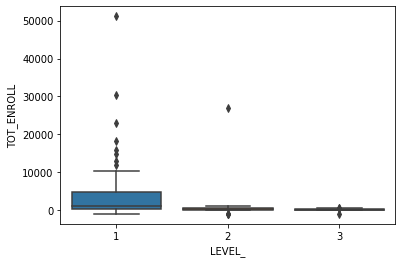

In [6]:
# Boxplot chart for bi-variable analysis
sns.boxplot(x='LEVEL_',y='TOT_ENROLL',data=nydata)

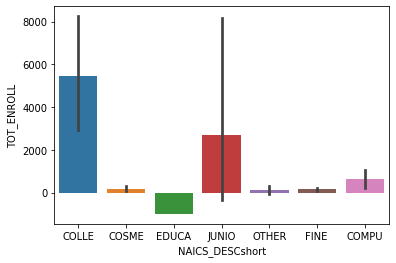

In [7]:
# Barplot chart for Analysis of three variables with grouping of one in NAICS classification
typeeduc =nydata
typeeduc['NAICS_DESCshort']=typeeduc['NAICS_DESC'].str[0:5].astype(str) # Transform Column
sns.barplot(x='NAICS_DESCshort',y='TOT_ENROLL',data=typeeduc)

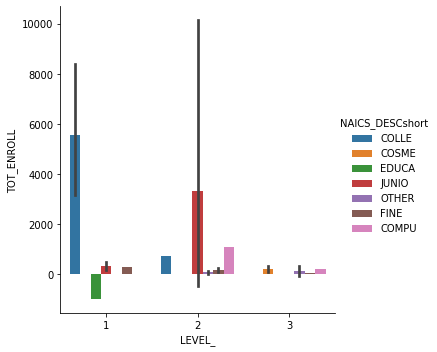

In [8]:
sns.catplot(x="LEVEL_", y="TOT_ENROLL", hue='NAICS_DESCshort', kind="bar", data=typeeduc)

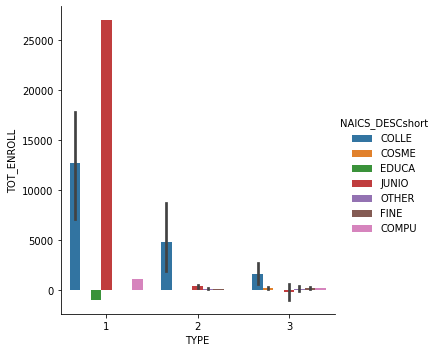

In [9]:
sns.catplot(x="TYPE", y="TOT_ENROLL", hue='NAICS_DESCshort', kind="bar", data=typeeduc)

In [10]:
# group education centers by clasificacion NAICS and apply sum() function 
df_type = nydata[['TYPE','TOT_ENROLL']].groupby('TYPE', axis=0).sum()
df_type['TOT_ENROLL'][df_type.TOT_ENROLL== -999] = 0
# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df_type.groupby('TYPE', axis=0)))
df_type

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,TOT_ENROLL
TYPE,
1,116061
2,151152
3,15294


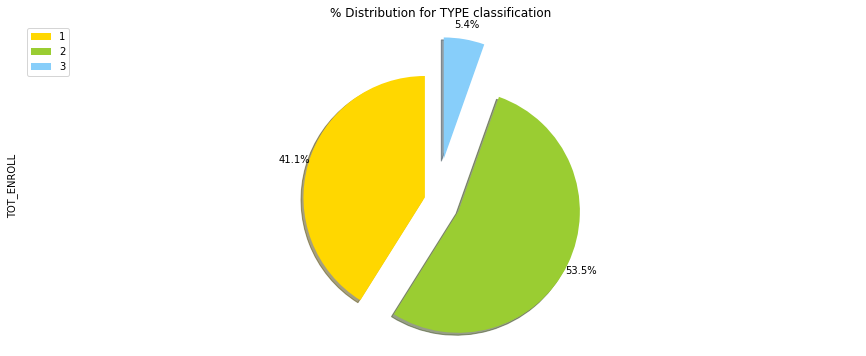

In [11]:
colors_list = ['gold', 'yellowgreen', 'lightskyblue']
explode_list = [0.1, 0.2, 0.35] # ratio for each NAICS with which to offset each wedge.
# autopct create %, start angle represent starting point
df_type['TOT_ENROLL'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 NAICS
                            )

plt.title('% Distribution for TYPE classification')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=df_type.index, loc='upper left') 
plt.show()

In [12]:
# group education centers by clasificacion NAICS and apply sum() function 
df_naics = typeeduc[['NAICS_DESCshort','TOT_ENROLL']].groupby('NAICS_DESCshort', axis=0).sum()
df_naics['TOT_ENROLL'][df_naics.TOT_ENROLL== -999] = 0
# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df_naics.groupby('NAICS_DESCshort', axis=0)))
df_naics

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,TOT_ENROLL
NAICS_DESCshort,
COLLE,251242
COMPU,1281
COSME,1460
EDUCA,0
FINE,764
JUNIO,27017
OTHER,1742


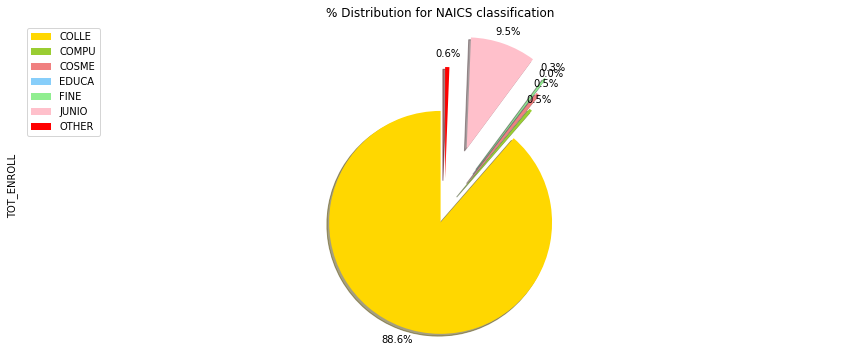

In [13]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'red']
explode_list = [0.1, 0.2, 0.35, 0.45, 0.5, 0.6,0.3] # ratio for each NAICS with which to offset each wedge.
# autopct create %, start angle represent starting point
df_naics['TOT_ENROLL'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 NAICS
                            )

plt.title('% Distribution for NAICS classification')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=df_naics.index, loc='upper left') 
plt.show()

In [14]:
# Top 10 educational centers by population
topn=nydata.sort_values('POPULATION',ascending=False)[:10]
topn

,ADDRESS,NAME,STATUS,LATITUDE,LONGITUDE,NAICS_DESC,NAICS_CODE,TYPE,POPULATION,LEVEL_,INST_SIZE,DORM_CAP,TOT_ENROLL,TOT_EMP,NAICS_DESCshort
40,70 WASHINGTON SQ SOUTH,NEW YORK UNIVERSITY,A,40.729452,-73.997264,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",611310,2,73997,1,5,13075,51123,22874,COLLE
51,WEST 116 ST AND BROADWAY,COLUMBIA UNIVERSITY IN THE CITY OF NEW YORK,A,40.808286,-73.961885,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",611310,2,50144,1,5,12953,30454,19690,COLLE
71,199 CHAMBERS ST,CUNY BOROUGH OF MANHATTAN COMMUNITY COLLEGE,A,40.718790,-74.011826,JUNIOR COLLEGES,611210,1,30069,2,5,-999,26932,3137,JUNIO
36,695 PARK AVE,CUNY HUNTER COLLEGE,A,40.768669,-73.964795,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",611310,1,27003,1,5,650,23005,3998,COLLE
21,ONE BERNARD BARUCH WAY (55 LEXINGTON AVE AT 24...,CUNY BERNARD M BARUCH COLLEGE,A,40.740238,-73.983417,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",611310,1,20836,1,4,414,18289,2547,COLLE
72,160 CONVENT AVE,CUNY CITY COLLEGE,A,40.819794,-73.950550,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",611310,1,18746,1,4,590,16001,2745,COLLE
46,524 W 59TH ST,CUNY JOHN JAY COLLEGE OF CRIMINAL JUSTICE,A,40.770346,-73.988403,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",611310,1,17160,1,4,176,14834,2326,COLLE
25,1 PACE PLAZA,PACE UNIVERSITY-NEW YORK,A,40.711710,-74.004874,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",611310,2,16256,1,4,3726,12986,3270,COLLE
10,500 7TH AVENUE,TOURO COLLEGE,A,40.753362,-73.989488,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",611310,2,14505,1,4,388,11908,2597,COLLE
9,66 WEST 12TH STREET,THE NEW SCHOOL,A,40.735498,-73.997158,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",611310,2,13736,1,4,1960,10389,3347,COLLE


In [15]:
# Create a list of colours. 
# We have  list of the top 10 
vcolors = [
    'red',
    'blue',
    'gray',
    'orange',
    'beige',
    'green',
    'purple',
    'pink',
    'cadetblue',
    'black'
]
ord= ['1','2','3','4','5','6','7','8','9','10']
# Add column 'colour' with colors to topn
topn['colour'] = vcolors
topn['orden'] = ord
#topn=topn.reset_index(drop=True)
topn

,ADDRESS,NAME,STATUS,LATITUDE,LONGITUDE,NAICS_DESC,NAICS_CODE,TYPE,POPULATION,LEVEL_,INST_SIZE,DORM_CAP,TOT_ENROLL,TOT_EMP,NAICS_DESCshort,colour,orden
40,70 WASHINGTON SQ SOUTH,NEW YORK UNIVERSITY,A,40.729452,-73.997264,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",611310,2,73997,1,5,13075,51123,22874,COLLE,red,1
51,WEST 116 ST AND BROADWAY,COLUMBIA UNIVERSITY IN THE CITY OF NEW YORK,A,40.808286,-73.961885,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",611310,2,50144,1,5,12953,30454,19690,COLLE,blue,2
71,199 CHAMBERS ST,CUNY BOROUGH OF MANHATTAN COMMUNITY COLLEGE,A,40.718790,-74.011826,JUNIOR COLLEGES,611210,1,30069,2,5,-999,26932,3137,JUNIO,gray,3
36,695 PARK AVE,CUNY HUNTER COLLEGE,A,40.768669,-73.964795,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",611310,1,27003,1,5,650,23005,3998,COLLE,orange,4
21,ONE BERNARD BARUCH WAY (55 LEXINGTON AVE AT 24...,CUNY BERNARD M BARUCH COLLEGE,A,40.740238,-73.983417,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",611310,1,20836,1,4,414,18289,2547,COLLE,beige,5
72,160 CONVENT AVE,CUNY CITY COLLEGE,A,40.819794,-73.950550,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",611310,1,18746,1,4,590,16001,2745,COLLE,green,6
46,524 W 59TH ST,CUNY JOHN JAY COLLEGE OF CRIMINAL JUSTICE,A,40.770346,-73.988403,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",611310,1,17160,1,4,176,14834,2326,COLLE,purple,7
25,1 PACE PLAZA,PACE UNIVERSITY-NEW YORK,A,40.711710,-74.004874,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",611310,2,16256,1,4,3726,12986,3270,COLLE,pink,8
10,500 7TH AVENUE,TOURO COLLEGE,A,40.753362,-73.989488,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",611310,2,14505,1,4,388,11908,2597,COLLE,cadetblue,9
9,66 WEST 12TH STREET,THE NEW SCHOOL,A,40.735498,-73.997158,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",611310,2,13736,1,4,1960,10389,3347,COLLE,black,10


In [16]:
data = topn
# Make an empty map
#m = folium.Map(location=[20, 0], tiles="Mapbox Bright", zoom_start=11)
 # Define NY's geolocation coordinates
ny_latitude = 40.7  
ny_longitude = -73.954

# Define the world map centered around NY with a higher zoom level   
ny_map = folium.Map(location=[ny_latitude, ny_longitude], zoom_start=11)

for lat, lng, label, co in zip(data['LATITUDE'], data['LONGITUDE'],data['orden'],data['colour']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        icon=folium.Icon(icon='cloud'),
        color=co,         
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False
    ).add_to(ny_map)


ny_map

# Save it as html
#ny_map.save('Topn_folium_map1.html')


<img align="left" style="padding-right:10px;" src="mapaNY01.jpg">

In [17]:
## Subseting columns
nydata.loc[nydata['DORM_CAP'] != -999, 'DORM_CAP'] = 1
nydata.loc[nydata['DORM_CAP'] == -999, 'DORM_CAP'] = 0
nydata.rename(columns={'DORM_CAP':'HOUSE_IN'},inplace=True)
## HOUSE_IN:   Transforms values 0: No bedrooms, 1: bedrooms 
nydata.head()

,ADDRESS,NAME,STATUS,LATITUDE,LONGITUDE,NAICS_DESC,NAICS_CODE,TYPE,POPULATION,LEVEL_,INST_SIZE,HOUSE_IN,TOT_ENROLL,TOT_EMP,NAICS_DESCshort
0,145 E BROADWAY,MESIVTHA TIFERETH JERUSALEM OF AMERICA,A,40.713812,-73.991271,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",611310,2,81,1,1,1,69,12,COLLE
1,290 MADISON AVENUE 5TH FLOOR,CARSTEN INSTITUTE OF COSMETOLOGY,A,40.751893,-73.980278,COSMETOLOGY AND BARBER SCHOOLS,611511,3,108,3,1,0,94,14,COSME
2,211 WEST 61ST STREET,AMERICAN MUSICAL AND DRAMATIC ACADEMY,A,40.772309,-73.987638,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",611310,2,1962,1,2,1,1515,447,COLLE
3,3 EAST 43 STREET,BERKELEY COLLEGE-NEW YORK,A,40.753993,-73.979434,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",611310,3,4155,1,2,0,3635,520,COLLE
4,205 EAST 42ND STREET,CUNY SYSTEM OFFICE,A,40.750855,-73.973595,EDUCATIONAL SUPPORT SERVICES,611710,1,1184,1,-2,0,-999,1184,EDUCA


In [18]:
nydata.shape

(86, 15)

In [19]:
#columns
nydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 15 columns):
ADDRESS            86 non-null object
NAME               86 non-null object
STATUS             86 non-null object
LATITUDE           86 non-null float64
LONGITUDE          86 non-null float64
NAICS_DESC         86 non-null object
NAICS_CODE         86 non-null int64
TYPE               86 non-null int64
POPULATION         86 non-null int64
LEVEL_             86 non-null int64
INST_SIZE          86 non-null int64
HOUSE_IN           86 non-null int64
TOT_ENROLL         86 non-null int64
TOT_EMP            86 non-null int64
NAICS_DESCshort    86 non-null object
dtypes: float64(2), int64(8), object(5)
memory usage: 10.2+ KB


## 4. Model & Evaluation <a name="model"></a>
### Data Wrangling for DataSet of Model
### Define Foursquare Credentials and Version to visualize dataframe and cluster in geospatial maps

##### Make sure that you have created a Foursquare developer account and have your credentials handy

In [63]:
CLIENT_ID = 'your Foursquare ID' # your Foursquare ID
CLIENT_SECRET = 'your Foursquare Secret' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: your Foursquare ID
CLIENT_SECRET:your Foursquare Secret


####  Using Folium to explore the neighborhoods of one point

In [21]:
## Test 
# create map of NY using latitude and longitude:
latitude = 40.751893 
longitude= -73.980278
#### -> Barrio o Neighboarhood ===>   Lenox Hill S (E68-York)                
### latitude=40.76292692
### longitude=-73.954911543
#### -> Barrio o Neighboarhood ===>   Lenox Hill S (E68-York)
mapny = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(nydata['LATITUDE'], nydata['LONGITUDE'],nydata['ADDRESS']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(mapny)  
    
mapny

<img align="left" style="padding-right:10px;" src="mapaNY02.jpg">

### Add columns to the Model Data Frame with features associated with the location of each ADDRESS using latitude and longitude coordinates.

In [22]:
radius = 100
LIMIT=300
lat = latitude
lng= longitude

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
# make the GET request
results = requests.get(url).json()["response"]["groups"][0]['items']
results

[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '58de9b06a370b96bd9c35ebe',
   'name': 'Everybody Fights',
   'location': {'address': '295 Madison Ave',
    'lat': 40.75208707773447,
    'lng': -73.97944973218665,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.75208707773447,
      'lng': -73.97944973218665}],
    'distance': 73,
    'postalCode': '10017',
    'cc': 'US',
    'city': 'New York',
    'state': 'NY',
    'country': 'United States',
    'formattedAddress': ['295 Madison Ave',
     'New York, NY 10017',
     'United States']},
   'categories': [{'id': '52f2ab2ebcbc57f1066b8b47',
     'name': 'Boxing Gym',
     'pluralName': 'Boxing Gyms',
     'shortName': 'Boxing Gym',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_',
      'suffix': '.png'},
     'primary': True}],
   'photos': {'count': 0, 'groups': []}},
  'refe

#### The function obtains longitude and latitude values and returns a dataframe with geospatial coordinates and category 

In [23]:
def getNearbyVenues(names, latitudes, longitudes, radius=300):    ##antes radius =500
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(names)
        # create the API request URL of type explore 
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        
        try:
            results = requests.get(url).json()["response"]['groups'][0]['items']
        except KeyError: 
            print('Key Errorr groups')
            raise
        else:
            venues_list.append([(
                name,
                lat,
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])
         
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [24]:
## Function Invocation getNearbyVenues
ny_venues = getNearbyVenues(names=nydata['ADDRESS'],
                                   latitudes=nydata['LATITUDE'],
                                   longitudes=nydata['LONGITUDE']
                                  )

0                                        145 E BROADWAY
1                          290 MADISON AVENUE 5TH FLOOR
2                                  211 WEST 61ST STREET
3                                      3 EAST 43 STREET
4                                  205 EAST 42ND STREET
5                                        60 WEST STREET
6                                  24 EAST 120TH STREET
7                                          12 E 53RD ST
8                                         221 E 71ST ST
9                                   66 WEST 12TH STREET
10                                       500 7TH AVENUE
11                              110 WILLIAM ST. 19TH FL
12                                          56 BROADWAY
13                                  45 WEST 34TH STREET
14                                   225 LIBERTY STREET
15                     115 WEST 27TH STREET, 11TH FLOOR
16                                    185 WEST BROADWAY
17                             218-232 WEST 40TH

0                                        145 E BROADWAY
1                          290 MADISON AVENUE 5TH FLOOR
2                                  211 WEST 61ST STREET
3                                      3 EAST 43 STREET
4                                  205 EAST 42ND STREET
5                                        60 WEST STREET
6                                  24 EAST 120TH STREET
7                                          12 E 53RD ST
8                                         221 E 71ST ST
9                                   66 WEST 12TH STREET
10                                       500 7TH AVENUE
11                              110 WILLIAM ST. 19TH FL
12                                          56 BROADWAY
13                                  45 WEST 34TH STREET
14                                   225 LIBERTY STREET
15                     115 WEST 27TH STREET, 11TH FLOOR
16                                    185 WEST BROADWAY
17                             218-232 WEST 40TH

0                                        145 E BROADWAY
1                          290 MADISON AVENUE 5TH FLOOR
2                                  211 WEST 61ST STREET
3                                      3 EAST 43 STREET
4                                  205 EAST 42ND STREET
5                                        60 WEST STREET
6                                  24 EAST 120TH STREET
7                                          12 E 53RD ST
8                                         221 E 71ST ST
9                                   66 WEST 12TH STREET
10                                       500 7TH AVENUE
11                              110 WILLIAM ST. 19TH FL
12                                          56 BROADWAY
13                                  45 WEST 34TH STREET
14                                   225 LIBERTY STREET
15                     115 WEST 27TH STREET, 11TH FLOOR
16                                    185 WEST BROADWAY
17                             218-232 WEST 40TH

0                                        145 E BROADWAY
1                          290 MADISON AVENUE 5TH FLOOR
2                                  211 WEST 61ST STREET
3                                      3 EAST 43 STREET
4                                  205 EAST 42ND STREET
5                                        60 WEST STREET
6                                  24 EAST 120TH STREET
7                                          12 E 53RD ST
8                                         221 E 71ST ST
9                                   66 WEST 12TH STREET
10                                       500 7TH AVENUE
11                              110 WILLIAM ST. 19TH FL
12                                          56 BROADWAY
13                                  45 WEST 34TH STREET
14                                   225 LIBERTY STREET
15                     115 WEST 27TH STREET, 11TH FLOOR
16                                    185 WEST BROADWAY
17                             218-232 WEST 40TH

0                                        145 E BROADWAY
1                          290 MADISON AVENUE 5TH FLOOR
2                                  211 WEST 61ST STREET
3                                      3 EAST 43 STREET
4                                  205 EAST 42ND STREET
5                                        60 WEST STREET
6                                  24 EAST 120TH STREET
7                                          12 E 53RD ST
8                                         221 E 71ST ST
9                                   66 WEST 12TH STREET
10                                       500 7TH AVENUE
11                              110 WILLIAM ST. 19TH FL
12                                          56 BROADWAY
13                                  45 WEST 34TH STREET
14                                   225 LIBERTY STREET
15                     115 WEST 27TH STREET, 11TH FLOOR
16                                    185 WEST BROADWAY
17                             218-232 WEST 40TH

0                                        145 E BROADWAY
1                          290 MADISON AVENUE 5TH FLOOR
2                                  211 WEST 61ST STREET
3                                      3 EAST 43 STREET
4                                  205 EAST 42ND STREET
5                                        60 WEST STREET
6                                  24 EAST 120TH STREET
7                                          12 E 53RD ST
8                                         221 E 71ST ST
9                                   66 WEST 12TH STREET
10                                       500 7TH AVENUE
11                              110 WILLIAM ST. 19TH FL
12                                          56 BROADWAY
13                                  45 WEST 34TH STREET
14                                   225 LIBERTY STREET
15                     115 WEST 27TH STREET, 11TH FLOOR
16                                    185 WEST BROADWAY
17                             218-232 WEST 40TH

0                                        145 E BROADWAY
1                          290 MADISON AVENUE 5TH FLOOR
2                                  211 WEST 61ST STREET
3                                      3 EAST 43 STREET
4                                  205 EAST 42ND STREET
5                                        60 WEST STREET
6                                  24 EAST 120TH STREET
7                                          12 E 53RD ST
8                                         221 E 71ST ST
9                                   66 WEST 12TH STREET
10                                       500 7TH AVENUE
11                              110 WILLIAM ST. 19TH FL
12                                          56 BROADWAY
13                                  45 WEST 34TH STREET
14                                   225 LIBERTY STREET
15                     115 WEST 27TH STREET, 11TH FLOOR
16                                    185 WEST BROADWAY
17                             218-232 WEST 40TH

0                                        145 E BROADWAY
1                          290 MADISON AVENUE 5TH FLOOR
2                                  211 WEST 61ST STREET
3                                      3 EAST 43 STREET
4                                  205 EAST 42ND STREET
5                                        60 WEST STREET
6                                  24 EAST 120TH STREET
7                                          12 E 53RD ST
8                                         221 E 71ST ST
9                                   66 WEST 12TH STREET
10                                       500 7TH AVENUE
11                              110 WILLIAM ST. 19TH FL
12                                          56 BROADWAY
13                                  45 WEST 34TH STREET
14                                   225 LIBERTY STREET
15                     115 WEST 27TH STREET, 11TH FLOOR
16                                    185 WEST BROADWAY
17                             218-232 WEST 40TH

0                                        145 E BROADWAY
1                          290 MADISON AVENUE 5TH FLOOR
2                                  211 WEST 61ST STREET
3                                      3 EAST 43 STREET
4                                  205 EAST 42ND STREET
5                                        60 WEST STREET
6                                  24 EAST 120TH STREET
7                                          12 E 53RD ST
8                                         221 E 71ST ST
9                                   66 WEST 12TH STREET
10                                       500 7TH AVENUE
11                              110 WILLIAM ST. 19TH FL
12                                          56 BROADWAY
13                                  45 WEST 34TH STREET
14                                   225 LIBERTY STREET
15                     115 WEST 27TH STREET, 11TH FLOOR
16                                    185 WEST BROADWAY
17                             218-232 WEST 40TH

0                                        145 E BROADWAY
1                          290 MADISON AVENUE 5TH FLOOR
2                                  211 WEST 61ST STREET
3                                      3 EAST 43 STREET
4                                  205 EAST 42ND STREET
5                                        60 WEST STREET
6                                  24 EAST 120TH STREET
7                                          12 E 53RD ST
8                                         221 E 71ST ST
9                                   66 WEST 12TH STREET
10                                       500 7TH AVENUE
11                              110 WILLIAM ST. 19TH FL
12                                          56 BROADWAY
13                                  45 WEST 34TH STREET
14                                   225 LIBERTY STREET
15                     115 WEST 27TH STREET, 11TH FLOOR
16                                    185 WEST BROADWAY
17                             218-232 WEST 40TH

0                                        145 E BROADWAY
1                          290 MADISON AVENUE 5TH FLOOR
2                                  211 WEST 61ST STREET
3                                      3 EAST 43 STREET
4                                  205 EAST 42ND STREET
5                                        60 WEST STREET
6                                  24 EAST 120TH STREET
7                                          12 E 53RD ST
8                                         221 E 71ST ST
9                                   66 WEST 12TH STREET
10                                       500 7TH AVENUE
11                              110 WILLIAM ST. 19TH FL
12                                          56 BROADWAY
13                                  45 WEST 34TH STREET
14                                   225 LIBERTY STREET
15                     115 WEST 27TH STREET, 11TH FLOOR
16                                    185 WEST BROADWAY
17                             218-232 WEST 40TH

0                                        145 E BROADWAY
1                          290 MADISON AVENUE 5TH FLOOR
2                                  211 WEST 61ST STREET
3                                      3 EAST 43 STREET
4                                  205 EAST 42ND STREET
5                                        60 WEST STREET
6                                  24 EAST 120TH STREET
7                                          12 E 53RD ST
8                                         221 E 71ST ST
9                                   66 WEST 12TH STREET
10                                       500 7TH AVENUE
11                              110 WILLIAM ST. 19TH FL
12                                          56 BROADWAY
13                                  45 WEST 34TH STREET
14                                   225 LIBERTY STREET
15                     115 WEST 27TH STREET, 11TH FLOOR
16                                    185 WEST BROADWAY
17                             218-232 WEST 40TH

0                                        145 E BROADWAY
1                          290 MADISON AVENUE 5TH FLOOR
2                                  211 WEST 61ST STREET
3                                      3 EAST 43 STREET
4                                  205 EAST 42ND STREET
5                                        60 WEST STREET
6                                  24 EAST 120TH STREET
7                                          12 E 53RD ST
8                                         221 E 71ST ST
9                                   66 WEST 12TH STREET
10                                       500 7TH AVENUE
11                              110 WILLIAM ST. 19TH FL
12                                          56 BROADWAY
13                                  45 WEST 34TH STREET
14                                   225 LIBERTY STREET
15                     115 WEST 27TH STREET, 11TH FLOOR
16                                    185 WEST BROADWAY
17                             218-232 WEST 40TH

0                                        145 E BROADWAY
1                          290 MADISON AVENUE 5TH FLOOR
2                                  211 WEST 61ST STREET
3                                      3 EAST 43 STREET
4                                  205 EAST 42ND STREET
5                                        60 WEST STREET
6                                  24 EAST 120TH STREET
7                                          12 E 53RD ST
8                                         221 E 71ST ST
9                                   66 WEST 12TH STREET
10                                       500 7TH AVENUE
11                              110 WILLIAM ST. 19TH FL
12                                          56 BROADWAY
13                                  45 WEST 34TH STREET
14                                   225 LIBERTY STREET
15                     115 WEST 27TH STREET, 11TH FLOOR
16                                    185 WEST BROADWAY
17                             218-232 WEST 40TH

0                                        145 E BROADWAY
1                          290 MADISON AVENUE 5TH FLOOR
2                                  211 WEST 61ST STREET
3                                      3 EAST 43 STREET
4                                  205 EAST 42ND STREET
5                                        60 WEST STREET
6                                  24 EAST 120TH STREET
7                                          12 E 53RD ST
8                                         221 E 71ST ST
9                                   66 WEST 12TH STREET
10                                       500 7TH AVENUE
11                              110 WILLIAM ST. 19TH FL
12                                          56 BROADWAY
13                                  45 WEST 34TH STREET
14                                   225 LIBERTY STREET
15                     115 WEST 27TH STREET, 11TH FLOOR
16                                    185 WEST BROADWAY
17                             218-232 WEST 40TH

0                                        145 E BROADWAY
1                          290 MADISON AVENUE 5TH FLOOR
2                                  211 WEST 61ST STREET
3                                      3 EAST 43 STREET
4                                  205 EAST 42ND STREET
5                                        60 WEST STREET
6                                  24 EAST 120TH STREET
7                                          12 E 53RD ST
8                                         221 E 71ST ST
9                                   66 WEST 12TH STREET
10                                       500 7TH AVENUE
11                              110 WILLIAM ST. 19TH FL
12                                          56 BROADWAY
13                                  45 WEST 34TH STREET
14                                   225 LIBERTY STREET
15                     115 WEST 27TH STREET, 11TH FLOOR
16                                    185 WEST BROADWAY
17                             218-232 WEST 40TH

0                                        145 E BROADWAY
1                          290 MADISON AVENUE 5TH FLOOR
2                                  211 WEST 61ST STREET
3                                      3 EAST 43 STREET
4                                  205 EAST 42ND STREET
5                                        60 WEST STREET
6                                  24 EAST 120TH STREET
7                                          12 E 53RD ST
8                                         221 E 71ST ST
9                                   66 WEST 12TH STREET
10                                       500 7TH AVENUE
11                              110 WILLIAM ST. 19TH FL
12                                          56 BROADWAY
13                                  45 WEST 34TH STREET
14                                   225 LIBERTY STREET
15                     115 WEST 27TH STREET, 11TH FLOOR
16                                    185 WEST BROADWAY
17                             218-232 WEST 40TH

0                                        145 E BROADWAY
1                          290 MADISON AVENUE 5TH FLOOR
2                                  211 WEST 61ST STREET
3                                      3 EAST 43 STREET
4                                  205 EAST 42ND STREET
5                                        60 WEST STREET
6                                  24 EAST 120TH STREET
7                                          12 E 53RD ST
8                                         221 E 71ST ST
9                                   66 WEST 12TH STREET
10                                       500 7TH AVENUE
11                              110 WILLIAM ST. 19TH FL
12                                          56 BROADWAY
13                                  45 WEST 34TH STREET
14                                   225 LIBERTY STREET
15                     115 WEST 27TH STREET, 11TH FLOOR
16                                    185 WEST BROADWAY
17                             218-232 WEST 40TH

0                                        145 E BROADWAY
1                          290 MADISON AVENUE 5TH FLOOR
2                                  211 WEST 61ST STREET
3                                      3 EAST 43 STREET
4                                  205 EAST 42ND STREET
5                                        60 WEST STREET
6                                  24 EAST 120TH STREET
7                                          12 E 53RD ST
8                                         221 E 71ST ST
9                                   66 WEST 12TH STREET
10                                       500 7TH AVENUE
11                              110 WILLIAM ST. 19TH FL
12                                          56 BROADWAY
13                                  45 WEST 34TH STREET
14                                   225 LIBERTY STREET
15                     115 WEST 27TH STREET, 11TH FLOOR
16                                    185 WEST BROADWAY
17                             218-232 WEST 40TH

0                                        145 E BROADWAY
1                          290 MADISON AVENUE 5TH FLOOR
2                                  211 WEST 61ST STREET
3                                      3 EAST 43 STREET
4                                  205 EAST 42ND STREET
5                                        60 WEST STREET
6                                  24 EAST 120TH STREET
7                                          12 E 53RD ST
8                                         221 E 71ST ST
9                                   66 WEST 12TH STREET
10                                       500 7TH AVENUE
11                              110 WILLIAM ST. 19TH FL
12                                          56 BROADWAY
13                                  45 WEST 34TH STREET
14                                   225 LIBERTY STREET
15                     115 WEST 27TH STREET, 11TH FLOOR
16                                    185 WEST BROADWAY
17                             218-232 WEST 40TH

0                                        145 E BROADWAY
1                          290 MADISON AVENUE 5TH FLOOR
2                                  211 WEST 61ST STREET
3                                      3 EAST 43 STREET
4                                  205 EAST 42ND STREET
5                                        60 WEST STREET
6                                  24 EAST 120TH STREET
7                                          12 E 53RD ST
8                                         221 E 71ST ST
9                                   66 WEST 12TH STREET
10                                       500 7TH AVENUE
11                              110 WILLIAM ST. 19TH FL
12                                          56 BROADWAY
13                                  45 WEST 34TH STREET
14                                   225 LIBERTY STREET
15                     115 WEST 27TH STREET, 11TH FLOOR
16                                    185 WEST BROADWAY
17                             218-232 WEST 40TH

0                                        145 E BROADWAY
1                          290 MADISON AVENUE 5TH FLOOR
2                                  211 WEST 61ST STREET
3                                      3 EAST 43 STREET
4                                  205 EAST 42ND STREET
5                                        60 WEST STREET
6                                  24 EAST 120TH STREET
7                                          12 E 53RD ST
8                                         221 E 71ST ST
9                                   66 WEST 12TH STREET
10                                       500 7TH AVENUE
11                              110 WILLIAM ST. 19TH FL
12                                          56 BROADWAY
13                                  45 WEST 34TH STREET
14                                   225 LIBERTY STREET
15                     115 WEST 27TH STREET, 11TH FLOOR
16                                    185 WEST BROADWAY
17                             218-232 WEST 40TH

0                                        145 E BROADWAY
1                          290 MADISON AVENUE 5TH FLOOR
2                                  211 WEST 61ST STREET
3                                      3 EAST 43 STREET
4                                  205 EAST 42ND STREET
5                                        60 WEST STREET
6                                  24 EAST 120TH STREET
7                                          12 E 53RD ST
8                                         221 E 71ST ST
9                                   66 WEST 12TH STREET
10                                       500 7TH AVENUE
11                              110 WILLIAM ST. 19TH FL
12                                          56 BROADWAY
13                                  45 WEST 34TH STREET
14                                   225 LIBERTY STREET
15                     115 WEST 27TH STREET, 11TH FLOOR
16                                    185 WEST BROADWAY
17                             218-232 WEST 40TH

0                                        145 E BROADWAY
1                          290 MADISON AVENUE 5TH FLOOR
2                                  211 WEST 61ST STREET
3                                      3 EAST 43 STREET
4                                  205 EAST 42ND STREET
5                                        60 WEST STREET
6                                  24 EAST 120TH STREET
7                                          12 E 53RD ST
8                                         221 E 71ST ST
9                                   66 WEST 12TH STREET
10                                       500 7TH AVENUE
11                              110 WILLIAM ST. 19TH FL
12                                          56 BROADWAY
13                                  45 WEST 34TH STREET
14                                   225 LIBERTY STREET
15                     115 WEST 27TH STREET, 11TH FLOOR
16                                    185 WEST BROADWAY
17                             218-232 WEST 40TH

0                                        145 E BROADWAY
1                          290 MADISON AVENUE 5TH FLOOR
2                                  211 WEST 61ST STREET
3                                      3 EAST 43 STREET
4                                  205 EAST 42ND STREET
5                                        60 WEST STREET
6                                  24 EAST 120TH STREET
7                                          12 E 53RD ST
8                                         221 E 71ST ST
9                                   66 WEST 12TH STREET
10                                       500 7TH AVENUE
11                              110 WILLIAM ST. 19TH FL
12                                          56 BROADWAY
13                                  45 WEST 34TH STREET
14                                   225 LIBERTY STREET
15                     115 WEST 27TH STREET, 11TH FLOOR
16                                    185 WEST BROADWAY
17                             218-232 WEST 40TH

0                                        145 E BROADWAY
1                          290 MADISON AVENUE 5TH FLOOR
2                                  211 WEST 61ST STREET
3                                      3 EAST 43 STREET
4                                  205 EAST 42ND STREET
5                                        60 WEST STREET
6                                  24 EAST 120TH STREET
7                                          12 E 53RD ST
8                                         221 E 71ST ST
9                                   66 WEST 12TH STREET
10                                       500 7TH AVENUE
11                              110 WILLIAM ST. 19TH FL
12                                          56 BROADWAY
13                                  45 WEST 34TH STREET
14                                   225 LIBERTY STREET
15                     115 WEST 27TH STREET, 11TH FLOOR
16                                    185 WEST BROADWAY
17                             218-232 WEST 40TH

0                                        145 E BROADWAY
1                          290 MADISON AVENUE 5TH FLOOR
2                                  211 WEST 61ST STREET
3                                      3 EAST 43 STREET
4                                  205 EAST 42ND STREET
5                                        60 WEST STREET
6                                  24 EAST 120TH STREET
7                                          12 E 53RD ST
8                                         221 E 71ST ST
9                                   66 WEST 12TH STREET
10                                       500 7TH AVENUE
11                              110 WILLIAM ST. 19TH FL
12                                          56 BROADWAY
13                                  45 WEST 34TH STREET
14                                   225 LIBERTY STREET
15                     115 WEST 27TH STREET, 11TH FLOOR
16                                    185 WEST BROADWAY
17                             218-232 WEST 40TH

0                                        145 E BROADWAY
1                          290 MADISON AVENUE 5TH FLOOR
2                                  211 WEST 61ST STREET
3                                      3 EAST 43 STREET
4                                  205 EAST 42ND STREET
5                                        60 WEST STREET
6                                  24 EAST 120TH STREET
7                                          12 E 53RD ST
8                                         221 E 71ST ST
9                                   66 WEST 12TH STREET
10                                       500 7TH AVENUE
11                              110 WILLIAM ST. 19TH FL
12                                          56 BROADWAY
13                                  45 WEST 34TH STREET
14                                   225 LIBERTY STREET
15                     115 WEST 27TH STREET, 11TH FLOOR
16                                    185 WEST BROADWAY
17                             218-232 WEST 40TH

0                                        145 E BROADWAY
1                          290 MADISON AVENUE 5TH FLOOR
2                                  211 WEST 61ST STREET
3                                      3 EAST 43 STREET
4                                  205 EAST 42ND STREET
5                                        60 WEST STREET
6                                  24 EAST 120TH STREET
7                                          12 E 53RD ST
8                                         221 E 71ST ST
9                                   66 WEST 12TH STREET
10                                       500 7TH AVENUE
11                              110 WILLIAM ST. 19TH FL
12                                          56 BROADWAY
13                                  45 WEST 34TH STREET
14                                   225 LIBERTY STREET
15                     115 WEST 27TH STREET, 11TH FLOOR
16                                    185 WEST BROADWAY
17                             218-232 WEST 40TH

0                                        145 E BROADWAY
1                          290 MADISON AVENUE 5TH FLOOR
2                                  211 WEST 61ST STREET
3                                      3 EAST 43 STREET
4                                  205 EAST 42ND STREET
5                                        60 WEST STREET
6                                  24 EAST 120TH STREET
7                                          12 E 53RD ST
8                                         221 E 71ST ST
9                                   66 WEST 12TH STREET
10                                       500 7TH AVENUE
11                              110 WILLIAM ST. 19TH FL
12                                          56 BROADWAY
13                                  45 WEST 34TH STREET
14                                   225 LIBERTY STREET
15                     115 WEST 27TH STREET, 11TH FLOOR
16                                    185 WEST BROADWAY
17                             218-232 WEST 40TH

0                                        145 E BROADWAY
1                          290 MADISON AVENUE 5TH FLOOR
2                                  211 WEST 61ST STREET
3                                      3 EAST 43 STREET
4                                  205 EAST 42ND STREET
5                                        60 WEST STREET
6                                  24 EAST 120TH STREET
7                                          12 E 53RD ST
8                                         221 E 71ST ST
9                                   66 WEST 12TH STREET
10                                       500 7TH AVENUE
11                              110 WILLIAM ST. 19TH FL
12                                          56 BROADWAY
13                                  45 WEST 34TH STREET
14                                   225 LIBERTY STREET
15                     115 WEST 27TH STREET, 11TH FLOOR
16                                    185 WEST BROADWAY
17                             218-232 WEST 40TH

0                                        145 E BROADWAY
1                          290 MADISON AVENUE 5TH FLOOR
2                                  211 WEST 61ST STREET
3                                      3 EAST 43 STREET
4                                  205 EAST 42ND STREET
5                                        60 WEST STREET
6                                  24 EAST 120TH STREET
7                                          12 E 53RD ST
8                                         221 E 71ST ST
9                                   66 WEST 12TH STREET
10                                       500 7TH AVENUE
11                              110 WILLIAM ST. 19TH FL
12                                          56 BROADWAY
13                                  45 WEST 34TH STREET
14                                   225 LIBERTY STREET
15                     115 WEST 27TH STREET, 11TH FLOOR
16                                    185 WEST BROADWAY
17                             218-232 WEST 40TH

0                                        145 E BROADWAY
1                          290 MADISON AVENUE 5TH FLOOR
2                                  211 WEST 61ST STREET
3                                      3 EAST 43 STREET
4                                  205 EAST 42ND STREET
5                                        60 WEST STREET
6                                  24 EAST 120TH STREET
7                                          12 E 53RD ST
8                                         221 E 71ST ST
9                                   66 WEST 12TH STREET
10                                       500 7TH AVENUE
11                              110 WILLIAM ST. 19TH FL
12                                          56 BROADWAY
13                                  45 WEST 34TH STREET
14                                   225 LIBERTY STREET
15                     115 WEST 27TH STREET, 11TH FLOOR
16                                    185 WEST BROADWAY
17                             218-232 WEST 40TH

0                                        145 E BROADWAY
1                          290 MADISON AVENUE 5TH FLOOR
2                                  211 WEST 61ST STREET
3                                      3 EAST 43 STREET
4                                  205 EAST 42ND STREET
5                                        60 WEST STREET
6                                  24 EAST 120TH STREET
7                                          12 E 53RD ST
8                                         221 E 71ST ST
9                                   66 WEST 12TH STREET
10                                       500 7TH AVENUE
11                              110 WILLIAM ST. 19TH FL
12                                          56 BROADWAY
13                                  45 WEST 34TH STREET
14                                   225 LIBERTY STREET
15                     115 WEST 27TH STREET, 11TH FLOOR
16                                    185 WEST BROADWAY
17                             218-232 WEST 40TH

0                                        145 E BROADWAY
1                          290 MADISON AVENUE 5TH FLOOR
2                                  211 WEST 61ST STREET
3                                      3 EAST 43 STREET
4                                  205 EAST 42ND STREET
5                                        60 WEST STREET
6                                  24 EAST 120TH STREET
7                                          12 E 53RD ST
8                                         221 E 71ST ST
9                                   66 WEST 12TH STREET
10                                       500 7TH AVENUE
11                              110 WILLIAM ST. 19TH FL
12                                          56 BROADWAY
13                                  45 WEST 34TH STREET
14                                   225 LIBERTY STREET
15                     115 WEST 27TH STREET, 11TH FLOOR
16                                    185 WEST BROADWAY
17                             218-232 WEST 40TH

0                                        145 E BROADWAY
1                          290 MADISON AVENUE 5TH FLOOR
2                                  211 WEST 61ST STREET
3                                      3 EAST 43 STREET
4                                  205 EAST 42ND STREET
5                                        60 WEST STREET
6                                  24 EAST 120TH STREET
7                                          12 E 53RD ST
8                                         221 E 71ST ST
9                                   66 WEST 12TH STREET
10                                       500 7TH AVENUE
11                              110 WILLIAM ST. 19TH FL
12                                          56 BROADWAY
13                                  45 WEST 34TH STREET
14                                   225 LIBERTY STREET
15                     115 WEST 27TH STREET, 11TH FLOOR
16                                    185 WEST BROADWAY
17                             218-232 WEST 40TH

0                                        145 E BROADWAY
1                          290 MADISON AVENUE 5TH FLOOR
2                                  211 WEST 61ST STREET
3                                      3 EAST 43 STREET
4                                  205 EAST 42ND STREET
5                                        60 WEST STREET
6                                  24 EAST 120TH STREET
7                                          12 E 53RD ST
8                                         221 E 71ST ST
9                                   66 WEST 12TH STREET
10                                       500 7TH AVENUE
11                              110 WILLIAM ST. 19TH FL
12                                          56 BROADWAY
13                                  45 WEST 34TH STREET
14                                   225 LIBERTY STREET
15                     115 WEST 27TH STREET, 11TH FLOOR
16                                    185 WEST BROADWAY
17                             218-232 WEST 40TH

0                                        145 E BROADWAY
1                          290 MADISON AVENUE 5TH FLOOR
2                                  211 WEST 61ST STREET
3                                      3 EAST 43 STREET
4                                  205 EAST 42ND STREET
5                                        60 WEST STREET
6                                  24 EAST 120TH STREET
7                                          12 E 53RD ST
8                                         221 E 71ST ST
9                                   66 WEST 12TH STREET
10                                       500 7TH AVENUE
11                              110 WILLIAM ST. 19TH FL
12                                          56 BROADWAY
13                                  45 WEST 34TH STREET
14                                   225 LIBERTY STREET
15                     115 WEST 27TH STREET, 11TH FLOOR
16                                    185 WEST BROADWAY
17                             218-232 WEST 40TH

0                                        145 E BROADWAY
1                          290 MADISON AVENUE 5TH FLOOR
2                                  211 WEST 61ST STREET
3                                      3 EAST 43 STREET
4                                  205 EAST 42ND STREET
5                                        60 WEST STREET
6                                  24 EAST 120TH STREET
7                                          12 E 53RD ST
8                                         221 E 71ST ST
9                                   66 WEST 12TH STREET
10                                       500 7TH AVENUE
11                              110 WILLIAM ST. 19TH FL
12                                          56 BROADWAY
13                                  45 WEST 34TH STREET
14                                   225 LIBERTY STREET
15                     115 WEST 27TH STREET, 11TH FLOOR
16                                    185 WEST BROADWAY
17                             218-232 WEST 40TH

0                                        145 E BROADWAY
1                          290 MADISON AVENUE 5TH FLOOR
2                                  211 WEST 61ST STREET
3                                      3 EAST 43 STREET
4                                  205 EAST 42ND STREET
5                                        60 WEST STREET
6                                  24 EAST 120TH STREET
7                                          12 E 53RD ST
8                                         221 E 71ST ST
9                                   66 WEST 12TH STREET
10                                       500 7TH AVENUE
11                              110 WILLIAM ST. 19TH FL
12                                          56 BROADWAY
13                                  45 WEST 34TH STREET
14                                   225 LIBERTY STREET
15                     115 WEST 27TH STREET, 11TH FLOOR
16                                    185 WEST BROADWAY
17                             218-232 WEST 40TH

0                                        145 E BROADWAY
1                          290 MADISON AVENUE 5TH FLOOR
2                                  211 WEST 61ST STREET
3                                      3 EAST 43 STREET
4                                  205 EAST 42ND STREET
5                                        60 WEST STREET
6                                  24 EAST 120TH STREET
7                                          12 E 53RD ST
8                                         221 E 71ST ST
9                                   66 WEST 12TH STREET
10                                       500 7TH AVENUE
11                              110 WILLIAM ST. 19TH FL
12                                          56 BROADWAY
13                                  45 WEST 34TH STREET
14                                   225 LIBERTY STREET
15                     115 WEST 27TH STREET, 11TH FLOOR
16                                    185 WEST BROADWAY
17                             218-232 WEST 40TH

0                                        145 E BROADWAY
1                          290 MADISON AVENUE 5TH FLOOR
2                                  211 WEST 61ST STREET
3                                      3 EAST 43 STREET
4                                  205 EAST 42ND STREET
5                                        60 WEST STREET
6                                  24 EAST 120TH STREET
7                                          12 E 53RD ST
8                                         221 E 71ST ST
9                                   66 WEST 12TH STREET
10                                       500 7TH AVENUE
11                              110 WILLIAM ST. 19TH FL
12                                          56 BROADWAY
13                                  45 WEST 34TH STREET
14                                   225 LIBERTY STREET
15                     115 WEST 27TH STREET, 11TH FLOOR
16                                    185 WEST BROADWAY
17                             218-232 WEST 40TH

0                                        145 E BROADWAY
1                          290 MADISON AVENUE 5TH FLOOR
2                                  211 WEST 61ST STREET
3                                      3 EAST 43 STREET
4                                  205 EAST 42ND STREET
5                                        60 WEST STREET
6                                  24 EAST 120TH STREET
7                                          12 E 53RD ST
8                                         221 E 71ST ST
9                                   66 WEST 12TH STREET
10                                       500 7TH AVENUE
11                              110 WILLIAM ST. 19TH FL
12                                          56 BROADWAY
13                                  45 WEST 34TH STREET
14                                   225 LIBERTY STREET
15                     115 WEST 27TH STREET, 11TH FLOOR
16                                    185 WEST BROADWAY
17                             218-232 WEST 40TH

### Dataframe with geospatial coordinate data associated with Address

In [25]:
ny_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,145 E BROADWAY,40.713812,-73.991271,Metrograph,40.714999,-73.991035,Indie Movie Theater
1,145 E BROADWAY,40.713812,-73.991271,Kiki's,40.714476,-73.992036,Greek Restaurant
2,145 E BROADWAY,40.713812,-73.991271,Hawa Smoothies,40.714200,-73.989390,Juice Bar
3,145 E BROADWAY,40.713812,-73.991271,Little Canal,40.714317,-73.990361,Coffee Shop
4,145 E BROADWAY,40.713812,-73.991271,Bar Belly,40.715135,-73.991802,Cocktail Bar


In [26]:
#check how many venues were returned for each neighborhood
ny_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
1 PACE PLAZA,65,65,65,65,65,65
11 PARK PLACE 4TH FLOOR,92,92,92,92,92,92
110 WILLIAM ST. 19TH FL,100,100,100,100,100,100
111 FRANKLIN ST,100,100,100,100,100,100
"115 WEST 27TH STREET, 11TH FLOOR",100,100,100,100,100,100
12 E 53RD ST,78,78,78,78,78,78
120 CLAREMONT AVENUE,19,19,19,19,19,19
120 MADISON AVE,100,100,100,100,100,100
"1230 AVENUE OF THE AMERICAS, 20TH FLOOR",100,100,100,100,100,100


In [27]:
print('There are {} uniques categories.'.format(len(ny_venues['Venue Category'].unique())))

There are 334 uniques categories.


### Analyze each neighborhood of dataframe dfvenues, indicating categories of neighborhood venues

In [28]:
# one hot encoding
ny_onehot = pd.get_dummies(ny_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ny_onehot['Neighborhood'] = ny_venues['Neighborhood'] 

# move neighborhood column to the first column
cols=list(ny_onehot.columns.values)
cols.pop(cols.index('Neighborhood'))
ny_onehot=ny_onehot[['Neighborhood']+cols]

# rename Neighborhood for Neighbourhood so that future merge works
ny_onehot.rename(columns = {'Neighborhood': 'Neighborhood'}, inplace = True)
ny_onehot.head()

,Neighborhood,Accessories Store,Acupuncturist,Afghan Restaurant,African Restaurant,American Restaurant,Amphitheater,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Basketball Stadium,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Business Service,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Churrascaria,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Gym,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Dentist's Office,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Luggage Store,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Photography Lab,Physical Therapist,Piano Bar,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Public Art,Rafting,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Restaurant,River,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,

In [29]:
ny_onehot.shape

(5909, 335)

#### We will group by dataframe neighborhood (ny_onehot)

In [30]:
ny_grouped = ny_onehot.groupby('Neighborhood').mean().reset_index()
ny_grouped

,Neighborhood,Accessories Store,Acupuncturist,Afghan Restaurant,African Restaurant,American Restaurant,Amphitheater,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Basketball Stadium,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Business Service,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Churrascaria,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Gym,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Dentist's Office,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Luggage Store,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Photography Lab,Physical Therapist,Piano Bar,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Public Art,Rafting,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Restaurant,River,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,

In [31]:
## Size of dataframe
ny_grouped.shape

(86, 335)

### Define the dataframe with the attributes associated to the neighborhood and to be used in the K-means model

In [32]:
## Function that returns the popular neighboring places 
## when passing a row of neighborhood and the maximum ranking or the maximum tops to look for
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]  

In [33]:
def returnTopCommonVenues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    ##print(row_categories_sorted)
    
    return row_categories_sorted.values[0:num_top_venues] ##index.values[0:num_top_venues]


def returntopn(dfsource,   topn=10):
    num_top_venues=topn
    x_grouped=dfsource
    indicators = ['st', 'nd', 'rd']
    # create columns according to number of top venues
    columns = ['Neighborhood']
    for ind in np.arange(num_top_venues):
            try:
                columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
            except:
                columns.append('{}th Most Common Venue'.format(ind+1))
    # create a new dataframe
    NeighborhoodsNumSorted = pd.DataFrame(columns=columns)
    NeighborhoodsNumSorted['Neighborhood'] =x_grouped['Neighborhood']
    for ind in np.arange(x_grouped.shape[0]):
        NeighborhoodsNumSorted.iloc[ind, 1:] = returnTopCommonVenues(x_grouped.iloc[ind, :], num_top_venues)
        #print("Origen: ",returnTopCommonVenues(x_grouped.iloc[ind, :], num_top_venues))
    return NeighborhoodsNumSorted

dfgrouped=returntopn(ny_grouped,10)

In [34]:
dfgrouped.shape

(86, 11)

In [35]:
## Create Dataframe with columns added with top data from neighboring places
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = ny_grouped['Neighborhood']

for ind in np.arange(ny_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ny_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1 PACE PLAZA,Plaza,Sandwich Place,Coffee Shop,Park,Gym,Café,Pizza Place,Hotel,Bar,Restaurant
1,11 PARK PLACE 4TH FLOOR,Hotel,Coffee Shop,Italian Restaurant,Hotel Bar,Sandwich Place,Gym,Gym / Fitness Center,Café,Bar,American Restaurant
2,110 WILLIAM ST. 19TH FL,Coffee Shop,Hotel,Deli / Bodega,American Restaurant,Sandwich Place,Italian Restaurant,Pizza Place,Café,Juice Bar,Roof Deck
3,111 FRANKLIN ST,Gym / Fitness Center,Italian Restaurant,Cocktail Bar,French Restaurant,Boutique,Theater,Coffee Shop,Spa,Bakery,Diner
4,"115 WEST 27TH STREET, 11TH FLOOR",Hotel,Flower Shop,Bar,Coffee Shop,Gym,Sandwich Place,Martial Arts Dojo,Café,Performing Arts Venue,Gym / Fitness Center
5,12 E 53RD ST,Boutique,Jewelry Store,Hotel,Gym,Italian Restaurant,Coffee Shop,Greek Restaurant,Steakhouse,Hotel Bar,Clothing Store
6,120 CLAREMONT AVENUE,Italian Restaurant,Coffee Shop,College Theater,Food Truck,Garden,Chinese Restaurant,Tea Room,Seafood Restaurant,Park,Burger Joint
7,120 MADISON AVE,Korean Restaurant,Hotel,Coffee Shop,Bakery,Hotel Bar,Spa,Gym / Fitness Center,Dessert Shop,Café,Japanese Restaurant
8,"1230 AVENUE OF THE AMERICAS, 20TH FLOOR",Hotel,Bakery,Clothing Store,Sporting Goods Shop,Coffee Shop,Spa,Food Truck,Cocktail Bar,Bookstore,Steakhouse
9,1230 YORK AVENUE,Park,Pharmacy,Flea Market,Coffee Shop,Liquor Store,Yoga Studio,Fabric Shop,English Restaurant,Ethiopian Restaurant,Event Space


In [36]:
## Retrieve neighborhoods_venues_sorted
neighborhoods_venues_sorted.to_csv('fyneighborhoods_venues_sorted.csv')
## Uncomment start 
# neighborhoods_venues_sorted = pd.read_csv('fyneighborhoods_venues_sorted.csv')
# neighborhoods_venues_sorted.drop(['Unnamed: 0'], axis=1, inplace=True)

### k-means Model applied 

### Apply the Clusters model to the Neighborhood Dataframe

In [37]:
neighborhoods_venues_sorted.shape

(86, 11)

In [38]:
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1 PACE PLAZA,Plaza,Sandwich Place,Coffee Shop,Park,Gym,Café,Pizza Place,Hotel,Bar,Restaurant
1,11 PARK PLACE 4TH FLOOR,Hotel,Coffee Shop,Italian Restaurant,Hotel Bar,Sandwich Place,Gym,Gym / Fitness Center,Café,Bar,American Restaurant
2,110 WILLIAM ST. 19TH FL,Coffee Shop,Hotel,Deli / Bodega,American Restaurant,Sandwich Place,Italian Restaurant,Pizza Place,Café,Juice Bar,Roof Deck
3,111 FRANKLIN ST,Gym / Fitness Center,Italian Restaurant,Cocktail Bar,French Restaurant,Boutique,Theater,Coffee Shop,Spa,Bakery,Diner
4,"115 WEST 27TH STREET, 11TH FLOOR",Hotel,Flower Shop,Bar,Coffee Shop,Gym,Sandwich Place,Martial Arts Dojo,Café,Performing Arts Venue,Gym / Fitness Center


In [39]:
neighborhoods_venues_sorted.rename(columns = {'Neighborhood': 'ADDRESS'}, inplace = True)
nydatam=nydata.sort_values(['ADDRESS'],ascending=[True]).reset_index()
nydatam.drop(['index'], axis=1,inplace=True)
nydatam.head()

,ADDRESS,NAME,STATUS,LATITUDE,LONGITUDE,NAICS_DESC,NAICS_CODE,TYPE,POPULATION,LEVEL_,INST_SIZE,HOUSE_IN,TOT_ENROLL,TOT_EMP,NAICS_DESCshort
0,1 PACE PLAZA,PACE UNIVERSITY-NEW YORK,A,40.711710,-74.004874,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",611310,2,16256,1,4,1,12986,3270,COLLE
1,11 PARK PLACE 4TH FLOOR,NEW YORK CAREER INSTITUTE,A,40.713178,-74.008316,JUNIOR COLLEGES,611210,3,-999,2,-1,0,-999,-999,JUNIO
2,110 WILLIAM ST. 19TH FL,PACIFIC COLLEGE OF ORIENTAL MEDICINE-NEW YORK,A,40.708899,-74.006629,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",611310,3,732,1,1,0,578,154,COLLE
3,111 FRANKLIN ST,NEW YORK ACADEMY OF ART,A,40.718388,-74.006019,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",611310,2,224,1,1,0,119,105,COLLE
4,"115 WEST 27TH STREET, 11TH FLOOR",FOCUS PERSONAL TRAINING INSTITUTE,A,40.745880,-73.991781,OTHER TECHNICAL AND TRADE SCHOOLS,611519,3,83,3,1,0,70,13,OTHER


### We define the entrance to the Model

In [40]:
#nydata.head()
nydataclus= nydatam[['NAICS_CODE','TYPE','POPULATION','LEVEL_','INST_SIZE','HOUSE_IN','TOT_ENROLL','TOT_EMP']]
X = np.array(nydatam[['TYPE','POPULATION','LEVEL_','INST_SIZE','HOUSE_IN','TOT_ENROLL','TOT_EMP']])
y = np.array(nydatam['NAICS_CODE'])
X.shape

(86, 7)

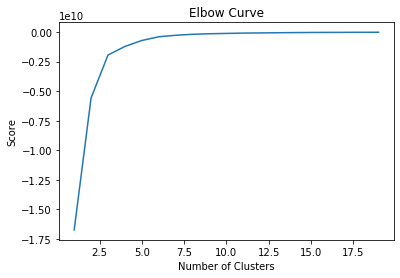

In [41]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

### We execute K-Means
### We select K = 4, determined by Elbow Curve

In [42]:
K=4
kmeans = KMeans(n_clusters=K).fit(X)
centroids = kmeans.cluster_centers_
centroids

array([[2.47826087e+00, 6.71130435e+02, 1.84057971e+00, 1.04347826e+00,
        2.75362319e-01, 4.68507246e+02, 1.30231884e+02],
       [2.00000000e+00, 6.20705000e+04, 1.00000000e+00, 5.00000000e+00,
        1.00000000e+00, 4.07885000e+04, 2.12820000e+04],
       [1.16666667e+00, 2.16783333e+04, 1.16666667e+00, 4.33333333e+00,
        8.33333333e-01, 1.86745000e+04, 3.00383333e+03],
       [1.88888889e+00, 1.01355556e+04, 1.00000000e+00, 2.77777778e+00,
        1.00000000e+00, 6.28400000e+03, 3.85155556e+03]])

In [43]:
print("Model with K=4 :",KMeans(n_clusters=K))

Model with K=4 : KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [44]:
# merge 
# add clustering labels
nydatam['Cluster Labels'] = kmeans.labels_
ny_merged = nydatam.join(neighborhoods_venues_sorted.set_index('ADDRESS'), on='ADDRESS')

In [45]:
ny_merged.head()

,ADDRESS,NAME,STATUS,LATITUDE,LONGITUDE,NAICS_DESC,NAICS_CODE,TYPE,POPULATION,LEVEL_,INST_SIZE,HOUSE_IN,TOT_ENROLL,TOT_EMP,NAICS_DESCshort,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1 PACE PLAZA,PACE UNIVERSITY-NEW YORK,A,40.711710,-74.004874,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",611310,2,16256,1,4,1,12986,3270,COLLE,2,Plaza,Sandwich Place,Coffee Shop,Park,Gym,Café,Pizza Place,Hotel,Bar,Restaurant
1,11 PARK PLACE 4TH FLOOR,NEW YORK CAREER INSTITUTE,A,40.713178,-74.008316,JUNIOR COLLEGES,611210,3,-999,2,-1,0,-999,-999,JUNIO,0,Hotel,Coffee Shop,Italian Restaurant,Hotel Bar,Sandwich Place,Gym,Gym / Fitness Center,Café,Bar,American Restaurant
2,110 WILLIAM ST. 19TH FL,PACIFIC COLLEGE OF ORIENTAL MEDICINE-NEW YORK,A,40.708899,-74.006629,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",611310,3,732,1,1,0,578,154,COLLE,0,Coffee Shop,Hotel,Deli / Bodega,American Restaurant,Sandwich Place,Italian Restaurant,Pizza Place,Café,Juice Bar,Roof Deck
3,111 FRANKLIN ST,NEW YORK ACADEMY OF ART,A,40.718388,-74.006019,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",611310,2,224,1,1,0,119,105,COLLE,0,Gym / Fitness Center,Italian Restaurant,Cocktail Bar,French Restaurant,Boutique,Theater,Coffee Shop,Spa,Bakery,Diner
4,"115 WEST 27TH STREET, 11TH FLOOR",FOCUS PERSONAL TRAINING INSTITUTE,A,40.745880,-73.991781,OTHER TECHNICAL AND TRADE SCHOOLS,611519,3,83,3,1,0,70,13,OTHER,0,Hotel,Flower Shop,Bar,Coffee Shop,Gym,Sandwich Place,Martial Arts Dojo,Café,Performing Arts Venue,Gym / Fitness Center


In [46]:
## Output for report
ny_merged[['ADDRESS','Cluster Labels','NAICS_CODE','TYPE','POPULATION','LEVEL_','TOT_ENROLL','1st Most Common Venue']].head()

,ADDRESS,Cluster Labels,NAICS_CODE,TYPE,POPULATION,LEVEL_,TOT_ENROLL,1st Most Common Venue
0,1 PACE PLAZA,2,611310,2,16256,1,12986,Plaza
1,11 PARK PLACE 4TH FLOOR,0,611210,3,-999,2,-999,Hotel
2,110 WILLIAM ST. 19TH FL,0,611310,3,732,1,578,Coffee Shop
3,111 FRANKLIN ST,0,611310,2,224,1,119,Gym / Fitness Center
4,"115 WEST 27TH STREET, 11TH FLOOR",0,611519,3,83,3,70,Hotel


In [47]:
ny_merged.to_csv('fynymergedClusterAssign.csv')
## ny_merged = pd.pd.read_csv('fynymergedClusterAssign.csv')
# ny_merged.drop(['Unnamed: 0'], axis=1, inplace=True)

## 5. Results <a name="results"></a>

### Predicting the clusters

In [48]:
# Features 'TYPE','POPULATION','LEVEL_','INST_SIZE','HOUSE_IN','TOT_ENROLL','TOT_EMP'
##labels = kmeans.predict(X)
labels = kmeans.labels_
clusterlist=['0','1','2','3']
copy =  pd.DataFrame()
copy['ADDRESS']=nydata['ADDRESS']
copy['NAICS_CODE']=nydata['NAICS_CODE'].values
copy['NAICS_DESCshort']=nydata['NAICS_DESCshort'].values
copy['label'] = labels;
qGrupo =  pd.DataFrame()
qGrupo['nroclust']=clusterlist[0:K]
qGrupo['quantity']=copy.groupby('label').size()
qGrupo

,nroclust,quantity
0,0,69
1,1,2
2,2,6
3,3,9


In [49]:
## NAICS_CODE
cpnaics =  pd.DataFrame()
cpnaics['ADDRESS']=nydata['ADDRESS']
cpnaics['NAICS_CODE']=nydata['NAICS_CODE'].values
vn=np.array(cpnaics['NAICS_CODE'].unique().tolist())
vn

array([611310, 611511, 611710, 611210, 611519, 611610, 611420])

## We can see the diversity in each work item. 
### For example in group 0,1,2,3,4 

### Indices by Cluster

In [50]:
##Indices of the elements of each cluster
ny_merged.groupby('Cluster Labels').groups

{0: Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 16, 17, 18, 19,
             21, 22, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39,
             40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
             58, 59, 61, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 78, 80, 81,
             84],
            dtype='int64'),
 1: Int64Index([79, 85], dtype='int64'),
 2: Int64Index([0, 15, 20, 63, 77, 82], dtype='int64'),
 3: Int64Index([11, 23, 31, 46, 60, 62, 64, 76, 83], dtype='int64')}

In [51]:
# Cluster = 0
t0 = pd.DataFrame()
t0 = ny_merged.loc[ny_merged.groupby('Cluster Labels').groups[0]]
t0[['ADDRESS','NAME','Cluster Labels','NAICS_DESC','TYPE','POPULATION','LEVEL_','TOT_ENROLL','1st Most Common Venue','2nd Most Common Venue']].head()

,ADDRESS,NAME,Cluster Labels,NAICS_DESC,TYPE,POPULATION,LEVEL_,TOT_ENROLL,1st Most Common Venue,2nd Most Common Venue
1,11 PARK PLACE 4TH FLOOR,NEW YORK CAREER INSTITUTE,0,JUNIOR COLLEGES,3,-999,2,-999,Hotel,Coffee Shop
2,110 WILLIAM ST. 19TH FL,PACIFIC COLLEGE OF ORIENTAL MEDICINE-NEW YORK,0,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",3,732,1,578,Coffee Shop,Hotel
3,111 FRANKLIN ST,NEW YORK ACADEMY OF ART,0,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",2,224,1,119,Gym / Fitness Center,Italian Restaurant
4,"115 WEST 27TH STREET, 11TH FLOOR",FOCUS PERSONAL TRAINING INSTITUTE,0,OTHER TECHNICAL AND TRADE SCHOOLS,3,83,3,70,Hotel,Flower Shop
5,12 E 53RD ST,LIM COLLEGE,0,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",3,2132,1,1713,Boutique,Jewelry Store


In [52]:
t0.describe()

,LATITUDE,LONGITUDE,NAICS_CODE,TYPE,POPULATION,LEVEL_,INST_SIZE,HOUSE_IN,TOT_ENROLL,TOT_EMP,Cluster Labels
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.0
mean,40.752876,-73.985512,611393.391304,2.478261,671.130435,1.840580,1.043478,0.275362,468.507246,130.231884,0.0
std,0.028596,0.017423,131.680788,0.584322,960.697922,0.884893,0.695252,0.449969,817.300661,396.956404,0.0
min,40.705781,-74.015157,611210.000000,1.000000,-999.000000,1.000000,-2.000000,0.000000,-999.000000,-999.000000,0.0
25%,40.739862,-73.995722,611310.000000,2.000000,122.000000,1.000000,1.000000,0.000000,103.000000,25.000000,0.0
50%,40.750855,-73.987638,611310.000000,3.000000,397.000000,2.000000,1.000000,0.000000,268.000000,74.000000,0.0
75%,40.762927,-73.977344,611519.000000,3.000000,1081.000000,3.000000,1.000000,1.000000,634.000000,244.000000,0.0
max,40.833434,-73.940306,611710.000000,3.000000,4155.000000,3.000000,2.000000,1.000000,3635.000000,1552.000000,0.0


In [53]:
# Cluster = 1
t1 = pd.DataFrame()
t1 = ny_merged.loc[ny_merged.groupby('Cluster Labels').groups[1]]
t1[['ADDRESS','NAME','Cluster Labels','NAICS_DESC','TYPE','POPULATION','LEVEL_','TOT_ENROLL','1st Most Common Venue','2nd Most Common Venue']].head()

,ADDRESS,NAME,Cluster Labels,NAICS_DESC,TYPE,POPULATION,LEVEL_,TOT_ENROLL,1st Most Common Venue,2nd Most Common Venue
79,70 WASHINGTON SQ SOUTH,NEW YORK UNIVERSITY,1,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",2,73997,1,51123,Coffee Shop,Italian Restaurant
85,WEST 116 ST AND BROADWAY,COLUMBIA UNIVERSITY IN THE CITY OF NEW YORK,1,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",2,50144,1,30454,Coffee Shop,Café


In [54]:
t1.describe()

,LATITUDE,LONGITUDE,NAICS_CODE,TYPE,POPULATION,LEVEL_,INST_SIZE,HOUSE_IN,TOT_ENROLL,TOT_EMP,Cluster Labels
count,2.000000,2.000000,2.0,2.0,2.000000,2.0,2.0,2.0,2.00000,2.000000,2.0
mean,40.768869,-73.979575,611310.0,2.0,62070.500000,1.0,5.0,1.0,40788.50000,21282.000000,1.0
std,0.055744,0.025017,0.0,0.0,16866.618052,0.0,0.0,0.0,14615.19006,2251.427991,0.0
min,40.729452,-73.997264,611310.0,2.0,50144.000000,1.0,5.0,1.0,30454.00000,19690.000000,1.0
25%,40.749160,-73.988419,611310.0,2.0,56107.250000,1.0,5.0,1.0,35621.25000,20486.000000,1.0
50%,40.768869,-73.979575,611310.0,2.0,62070.500000,1.0,5.0,1.0,40788.50000,21282.000000,1.0
75%,40.788577,-73.970730,611310.0,2.0,68033.750000,1.0,5.0,1.0,45955.75000,22078.000000,1.0
max,40.808286,-73.961885,611310.0,2.0,73997.000000,1.0,5.0,1.0,51123.00000,22874.000000,1.0


In [55]:
# Cluster = 2
t2 = pd.DataFrame()
t2 = ny_merged.loc[ny_merged.groupby('Cluster Labels').groups[2]]
t2[['ADDRESS','NAME','Cluster Labels','NAICS_DESC','TYPE','POPULATION','LEVEL_','TOT_ENROLL','1st Most Common Venue','2nd Most Common Venue']].head()

,ADDRESS,NAME,Cluster Labels,NAICS_DESC,TYPE,POPULATION,LEVEL_,TOT_ENROLL,1st Most Common Venue,2nd Most Common Venue
0,1 PACE PLAZA,PACE UNIVERSITY-NEW YORK,2,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",2,16256,1,12986,Plaza,Sandwich Place
15,160 CONVENT AVE,CUNY CITY COLLEGE,2,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",1,18746,1,16001,Café,Mexican Restaurant
20,199 CHAMBERS ST,CUNY BOROUGH OF MANHATTAN COMMUNITY COLLEGE,2,JUNIOR COLLEGES,1,30069,2,26932,Men's Store,American Restaurant
63,524 W 59TH ST,CUNY JOHN JAY COLLEGE OF CRIMINAL JUSTICE,2,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",1,17160,1,14834,Coffee Shop,Gym / Fitness Center
77,695 PARK AVE,CUNY HUNTER COLLEGE,2,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",1,27003,1,23005,Women's Store,Italian Restaurant


In [56]:
t2.describe()

,LATITUDE,LONGITUDE,NAICS_CODE,TYPE,POPULATION,LEVEL_,INST_SIZE,HOUSE_IN,TOT_ENROLL,TOT_EMP,Cluster Labels
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.0
mean,40.754924,-73.983978,611293.333333,1.166667,21678.333333,1.166667,4.333333,0.833333,18674.500000,3003.833333,2.0
std,0.040059,0.023313,40.824829,0.408248,5619.261541,0.408248,0.516398,0.408248,5316.845333,602.012431,0.0
min,40.711710,-74.011826,611210.000000,1.000000,16256.000000,1.000000,4.000000,0.000000,12986.000000,2326.000000,2.0
25%,40.724152,-74.000756,611310.000000,1.000000,17556.500000,1.000000,4.000000,1.000000,15125.750000,2596.500000,2.0
50%,40.754453,-73.985910,611310.000000,1.000000,19791.000000,1.000000,4.000000,1.000000,17145.000000,2941.000000,2.0
75%,40.769927,-73.969451,611310.000000,1.000000,25461.250000,1.000000,4.750000,1.000000,21826.000000,3236.750000,2.0
max,40.819794,-73.950550,611310.000000,2.000000,30069.000000,2.000000,5.000000,1.000000,26932.000000,3998.000000,2.0


In [57]:
# Cluster = 3
t3 = pd.DataFrame()
t3 = ny_merged.loc[ny_merged.groupby('Cluster Labels').groups[3]]
t3[['ADDRESS','NAME','Cluster Labels','NAICS_DESC','TYPE','POPULATION','LEVEL_','TOT_ENROLL','1st Most Common Venue','2nd Most Common Venue']].head()

,ADDRESS,NAME,Cluster Labels,NAICS_DESC,TYPE,POPULATION,LEVEL_,TOT_ENROLL,1st Most Common Venue,2nd Most Common Venue
11,"1300 YORK AVE, C-114",WEILL CORNELL MEDICAL COLLEGE,3,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",2,7976,1,1107,Coffee Shop,Café
23,209 E 23RD ST,SCHOOL OF VISUAL ARTS,3,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",3,6144,1,4393,Thrift / Vintage Store,Wine Shop
31,227 W 27TH ST,FASHION INSTITUTE OF TECHNOLOGY,3,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",1,10598,1,8846,Coffee Shop,Deli / Bodega
46,365 FIFTH AVE,CUNY GRADUATE SCHOOL AND UNIVERSITY CENTER,3,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",1,9165,1,7674,Korean Restaurant,Dessert Shop
60,500 7TH AVENUE,TOURO COLLEGE,3,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",2,14505,1,11908,Hotel,Dance Studio


In [58]:
t3.describe()

,LATITUDE,LONGITUDE,NAICS_CODE,TYPE,POPULATION,LEVEL_,INST_SIZE,HOUSE_IN,TOT_ENROLL,TOT_EMP,Cluster Labels
count,9.000000,9.000000,9.0,9.000000,9.000000,9.0,9.000000,9.0,9.000000,9.000000,9.0
mean,40.771031,-73.971596,611310.0,1.888889,10135.555556,1.0,2.777778,1.0,6284.000000,3851.555556,3.0
std,0.038702,0.023347,0.0,0.600925,3137.910695,0.0,0.833333,0.0,3801.764985,3491.478774,0.0
min,40.735498,-73.997158,611310.0,1.000000,6144.000000,1.0,2.000000,1.0,1107.000000,1491.000000,3.0
25%,40.747310,-73.989488,611310.0,2.000000,7976.000000,1.0,2.000000,1.0,4393.000000,1751.000000,3.0
50%,40.753362,-73.982240,611310.0,2.000000,9648.000000,1.0,3.000000,1.0,6330.000000,2597.000000,3.0
75%,40.789801,-73.954738,611310.0,2.000000,13216.000000,1.0,3.000000,1.0,8846.000000,3347.000000,3.0
max,40.850800,-73.928541,611310.0,3.000000,14505.000000,1.0,4.000000,1.0,11908.000000,12008.000000,3.0


### Applying Labeling Prediction
### Result of Applying K-means to New York Neighborhood dataframe in Clusters

In [59]:
## Top 1 neighborhood by Cluster
top1Clust0 =np.unique( np.array( t0[['1st Most Common Venue']] ))
top1Clust1 = np.unique( np.array( t1[['1st Most Common Venue']] ))
top1Clust2 = np.unique(np.array( t2[['1st Most Common Venue']] ))
top1Clust3 = np.unique(np.array( t3[['1st Most Common Venue']] ))
print("Top 1- Cluster 0: ",top1Clust0)
print("Top 1- Cluster 1: ",top1Clust1)
print("Top 1- Cluster 2: ",top1Clust2)
print("Top 1- Cluster 3: ",top1Clust3)

Top 1- Cluster 0:  ['American Restaurant' 'Art Gallery' 'Bar' 'Bookstore' 'Boutique'
 'Chinese Restaurant' 'Clothing Store' 'Coffee Shop' 'Deli / Bodega'
 'Gym / Fitness Center' 'Hotel' 'Italian Restaurant' 'Japanese Restaurant'
 'Korean Restaurant' 'Martial Arts Dojo' 'Park' 'Plaza' 'Sandwich Place'
 'Shoe Store' 'Tennis Court' 'Theater']
Top 1- Cluster 1:  ['Coffee Shop']
Top 1- Cluster 2:  ['Bar' 'Café' 'Coffee Shop' "Men's Store" 'Plaza' "Women's Store"]
Top 1- Cluster 3:  ['Café' 'Coffee Shop' 'Hotel' 'Italian Restaurant' 'Korean Restaurant'
 'Park' 'Seafood Restaurant' 'Thrift / Vintage Store']


In [60]:
##X = np.array(nydata[['TYPE','POPULATION','LEVEL_','INST_SIZE','HOUSE_IN','TOT_ENROLL','TOT_EMP']])
case0 =[3,4155,1,2,0,3635,520]      # idx 3  ; [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 16, 17, 18, 19,
          #  21, 22, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39,
          #  40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
          # 58, 59, 61, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 78, 80, 81,84]
case1 =[2,50144,1,5,1,30454,19620]           # idx 85  [79,85]
case2 =[2,16256,1,4,1,12986,3270]    # idx  0;  [0, 15, 20, 63, 77, 82]
case3=[2,7976,1,2,1,1107,6869]      # idx  11;  [11, 23, 31, 46, 60, 62, 64, 76, 83]
 
X_new = np.array([case0])  ## We assign the stock vector
new_labels = kmeans.predict(X_new)  ## Label of the Cluster to which it corresponds
print("cluster to which it belongs : ",new_labels)   ## Print the assigned cluster label
print("with features-> TYPE: {} , POPULATION: {}, LEVEL_: {}, INST_SIZE: {}, HOUSE_IN: {}, TOT_ENROLL: {}, TOT_EMP: {}".format(
    case0[0],case0[1],case0[2],case0[3],case0[4],case0[5],case0[6]))  ## Print the input characteristics

X_new = np.array([case1])  ## We assign the stock vector
new_labels = kmeans.predict(X_new)  ## Label of the Cluster to which it corresponds
print("cluster to which it belongs : ",new_labels)   ## Print the assigned cluster label
print("with features-> TYPE: {} , POPULATION: {}, LEVEL_: {}, INST_SIZE: {}, HOUSE_IN: {}, TOT_ENROLL: {}, TOT_EMP: {}".format(
    case1[0],case1[1],case1[2],case1[3],case1[4],case1[5],case1[6]))  ## Print the input characteristics

X_new = np.array([case2])  ## We assign the stock vector
new_labels = kmeans.predict(X_new)  ## Label of the Cluster to which it corresponds
print("cluster to which it belongs : ",new_labels)   ## Print the assigned cluster label
print("with features-> TYPE: {} , POPULATION: {}, LEVEL_: {}, INST_SIZE: {}, HOUSE_IN: {}, TOT_ENROLL: {}, TOT_EMP: {}".format(
    case2[0],case2[1],case2[2],case2[3],case2[4],case2[5],case2[6]))  ## Print the input characteristics

X_new = np.array([case3])  ## We assign the stock vector
new_labels = kmeans.predict(X_new)  ## Label of the Cluster to which it corresponds
print("cluster to which it belongs : ",new_labels)   ## Print the assigned cluster label
print("with features-> TYPE: {} , POPULATION: {}, LEVEL_: {}, INST_SIZE: {}, HOUSE_IN: {}, TOT_ENROLL: {}, TOT_EMP: {}".format(
    case3[0],case3[1],case3[2],case3[3],case3[4],case3[5],case3[6]))  ## Print the input characteristics


cluster to which it belongs :  [0]
with features-> TYPE: 3 , POPULATION: 4155, LEVEL_: 1, INST_SIZE: 2, HOUSE_IN: 0, TOT_ENROLL: 3635, TOT_EMP: 520
cluster to which it belongs :  [1]
with features-> TYPE: 2 , POPULATION: 50144, LEVEL_: 1, INST_SIZE: 5, HOUSE_IN: 1, TOT_ENROLL: 30454, TOT_EMP: 19620
cluster to which it belongs :  [2]
with features-> TYPE: 2 , POPULATION: 16256, LEVEL_: 1, INST_SIZE: 4, HOUSE_IN: 1, TOT_ENROLL: 12986, TOT_EMP: 3270
cluster to which it belongs :  [3]
with features-> TYPE: 2 , POPULATION: 7976, LEVEL_: 1, INST_SIZE: 2, HOUSE_IN: 1, TOT_ENROLL: 1107, TOT_EMP: 6869


#### View clusters on map of US - New York

In [61]:
### DataFrame for map
ny_merged=ny_merged.rename(columns = {'ADDRESS':'Neighborhood'})
ny_merged.head()

,Neighborhood,NAME,STATUS,LATITUDE,LONGITUDE,NAICS_DESC,NAICS_CODE,TYPE,POPULATION,LEVEL_,INST_SIZE,HOUSE_IN,TOT_ENROLL,TOT_EMP,NAICS_DESCshort,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1 PACE PLAZA,PACE UNIVERSITY-NEW YORK,A,40.711710,-74.004874,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",611310,2,16256,1,4,1,12986,3270,COLLE,2,Plaza,Sandwich Place,Coffee Shop,Park,Gym,Café,Pizza Place,Hotel,Bar,Restaurant
1,11 PARK PLACE 4TH FLOOR,NEW YORK CAREER INSTITUTE,A,40.713178,-74.008316,JUNIOR COLLEGES,611210,3,-999,2,-1,0,-999,-999,JUNIO,0,Hotel,Coffee Shop,Italian Restaurant,Hotel Bar,Sandwich Place,Gym,Gym / Fitness Center,Café,Bar,American Restaurant
2,110 WILLIAM ST. 19TH FL,PACIFIC COLLEGE OF ORIENTAL MEDICINE-NEW YORK,A,40.708899,-74.006629,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",611310,3,732,1,1,0,578,154,COLLE,0,Coffee Shop,Hotel,Deli / Bodega,American Restaurant,Sandwich Place,Italian Restaurant,Pizza Place,Café,Juice Bar,Roof Deck
3,111 FRANKLIN ST,NEW YORK ACADEMY OF ART,A,40.718388,-74.006019,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",611310,2,224,1,1,0,119,105,COLLE,0,Gym / Fitness Center,Italian Restaurant,Cocktail Bar,French Restaurant,Boutique,Theater,Coffee Shop,Spa,Bakery,Diner
4,"115 WEST 27TH STREET, 11TH FLOOR",FOCUS PERSONAL TRAINING INSTITUTE,A,40.745880,-73.991781,OTHER TECHNICAL AND TRADE SCHOOLS,611519,3,83,3,1,0,70,13,OTHER,0,Hotel,Flower Shop,Bar,Coffee Shop,Gym,Sandwich Place,Martial Arts Dojo,Café,Performing Arts Venue,Gym / Fitness Center


In [62]:
# create map with folium   

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(K)
ys = [i+x+(i*x)**2 for i in range(K)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [mc.rgb2hex(i) for i in colors_array]   # ['#8000ff', '#00b5eb', '#80ffb4', '#ffb360', '#ff0000'] # 
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ny_merged['LATITUDE'], ny_merged['LONGITUDE'], ny_merged['Neighborhood'], ny_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker( #
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<img align="left" style="padding-right:10px;" src="mapaNY03.jpg">

## 5.1. Resume of Results  <a name="resume"></a>

* With this result we can answer the questions raised in "Business problem" (a) and (c). For question (b) we can use the  Prediction results that label the cluster to which the new data obtained belongs.
* A relevant result is that the density variables populate the educational institutions (POPULATION, TOT_ENROLL, TOT_EMP, HOUSE_IN), are the key variables of the characterization of the groups and not the variables of grouping of educational entities (TYPE, LEVE_, NAICS


### Statistical metrics of the numerical variables of the Dataset applied to the Model
<img align="left" style="padding-right:10px;" src="MetricaEstadisticasClustersResultado.jpg">

## 6. Conclusions  <a name="conclusion"></a>

* Clusters are formed by the population density of the variables POPULATION, TOT_ENROLL, TOT_EMP and not by the classifications of educational institutions defined by TYPE, LEVEL_, NAICS. Therefore, cluster 0 with 69 observations has the association of more types of businesses than the other clusters and a diversity of educational institutions by TYPE, LEVEL and NAICS.
* The use of K-means to neighborhood problems is useful when combining the geographic data associated with demographic characteristics such as educational institutions with the neighborhood data of business premises provided with the FOURSQUARE API, that is to say enhances the labeling results from at least two perspectives, the first one defined by the clusters obtained and the association with the neighborhood, this provides the characterization of the groups obtained. The second point of view is the prediction when entering new data of the determining variables of the k-means model, we obtain a labeling that corresponds to one of the clusters and consequently we obtain characteristics and neighboring businesses (Top 10 in this project).
* K-mean is an algorithm that manages to discover new relationships between features, or it helps us to test or decline hypotheses we have of our business.
* Favorable results in the identification of crowded business groups (top 10) developed around educational institutions according to TYPE, POPULATION, LEVEL_, INST_SIZE, HOUSE_IN, TOT_ENROLL, TOT_EMP and geographic location given as a pivot.
* The K-means algorithm allows us to create clusters when we have unlabeled data groups.
* The clustering model can be improved by associating more data with each observation, since the purpose is to support the decision making of investors, data such as income, expenses, utility of neighboring businesses would be key variables in the prediction and labeling of clusters that are formed with this new data entry.

#### Author: Alfonso Pereda G.